# Neuronové sítě

Neuronové sítě jsou moderní metodou strojového učení. V současnosti existuje celá řada modelů a seznámení se s každým z nich je naprosto mimo rámec tohoto materiálu. Ukážeme si jen některé dopředné modely (*feedforward*) a zaměříme se spíše na aplikační rámec. Přehled všech zvířátek např. [neural network ZOO](https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZo19High.png).



## Opět logistická regrese

Uvažujme model ve tvaru

\begin{equation}
\hat{y}=\frac{1}{1+e^{-w\cdot x}},
\end{equation}
kde $w$ je vektor vah, $x$ je příslušný bod v příznakovém prostoru a $w\cdot x=\sum_k w_k x_k$ je skalární součin dvou vektorů. Použitá funkce na výstupu (**sigmoida**) převádí hodnotu skalárního součinu na interval $<0,1>$, mohu tedy interpretovat jako pravděpodobnost příslušnosti do dané třídy. Funkci, obecně nelineární, která realizuje transformaci skalárního součinu $w\cdot x$ ze vstupu na výstup nazýváme **aktivační funkcí**.

Parametry $w$ určíme jako optimalizační problém, zavedeme **ztrátovou funkci** (loss) $J(w)$. Nabízí se možnost formulace ve smyslu nejmenších čtverců:
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i(y_i-\hat{y}_i)^2,
\end{equation}
kde $\#X$ představuje počet příkladů v učební (trénovací) množině a opět sčítáme přes celý učební dataset.

Případně je možné (a pro klasifikaci se používá častěji) použít křížovou entropii. Zavedeme ji vztahem:
\begin{equation}
J(w)=-\frac{1}{\#X}\sum_i (y_i\log(\hat{y}_i)-(1-y_i)\log(1-\hat{y}_i)),
\end{equation}
kde definujeme $0\log(0)=0$, tj. v limitním smyslu.



**Grafická reprezentace vzorce - jiný formalismus**
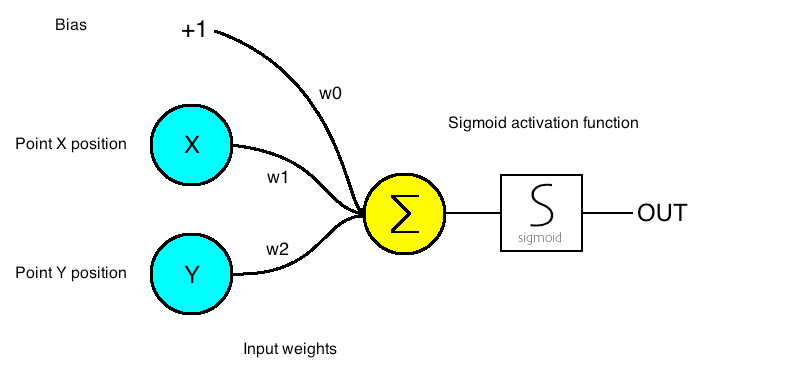

Zdroj: [https://www.cs.utexas.edu/~teammco/misc/perceptron/](https://www.cs.utexas.edu/~teammco/misc/perceptron/)

## Vícevrstvý perceptron - MLP
MLP (Multi Layer Perceptron) je rozšířením modelu historického modelu [perceptronu](https://cs.wikipedia.org/wiki/Perceptron). Na obrázku níže se vlastně jedná o použití dvou klasifikátorů např.typu logistická regrese (skrytá vrstva) a na ně je pak napojený další klasifikátor. Skrytá vrstva má tedy za úkol transformovat vstupní vektor dat $x=(x_1,x_2)$ tak, aby výsledný klasifikátor ve výstupní vrstvě poskytoval adekvátní výsledky.




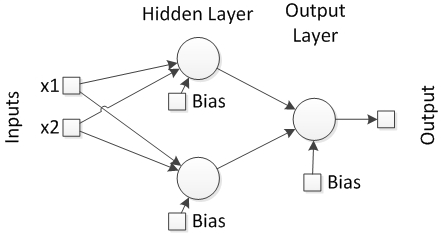

Zdroj: https://subscription.packtpub.com/book/big\_data\_and\_business\_intelligence/9781787126053/3/ch03lvl1sec27/multi-layer-perceptrons

V současnosti se též hodně používá pojem *Deep Learning*, čímž se myslí takové sítě, které mají velký počet skrytých vrstev. Na obrázku níže, je jednoduchý model, který má vstupní vrstvu, což je opět vektor hodnot $x$, dále má dvě skryté vrstvy a vrstvu výstupní, která je tvořena jednou výstupní buňkou, tedy výstupem je jedna skalární hodnota $\hat{y}$.

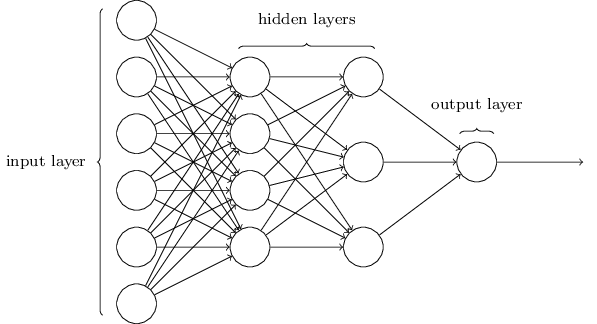

### Matematický model

 Předpokládejme tedy, že máme aktivační funkci, která je pro všechny buňky v dané vrstvě stejná, což je obvyklé. Dále ale můžeme používat v různých vrstvách různé **aktivační funkce**. Protože máme dvě skryté vrstvy, tak si označme $f^{1}_{i}(\,.)$ aktivační funkci v první vrstvě na *i-té* buňce a $f^{2}_{i}(\,.)$ na buňkách na vrstvě druhé.

Váhy mezi vstupní vrstvou a první skrytou vrstvou je možné reprezentovat maticí $W^1$ a to tak, že *i-tý* řádek matice představuje váhy (včetně biasu $b$) k *i-té* buňce. Tedy například pro první buňku první vrstvy máme následující skalární součin $W^1_{1} \cdot x$ (horní index vrstva, spodní index buňka), který vstoupí do této buňky a na výstup této buňky je produkován výstup aktivační funkce $f^{1}_{1}(W^1_{1} \cdot x)$. Protože uvažujeme, že aktivační funkce jsou napříč danou vrstvou stejné, tak zanedbáme spodní indexy příslušející jednotlivým buňkám a budeme chápat operaci vektorizovaně, tedy rovnice
\begin{equation}
x^{(1)}=f^{1}(W^1 \cdot x_{input}),
\end{equation}
představuje vektor hodnot, který produkuje na vstup $x$ při daných vahách $W^1$ první skrytá vrstva. Tento vektor $x^{(1)}$ je ovšem vstupem do druhé vrstvy, kde je situace analogická, tedy
\begin{equation}
x^{(2}=f^{2}(W^2 \cdot x^{(1)}).
\end{equation}
A toto celé s vahami $W^{o}$ vstupuje do výstupní buňky, kde je aktivační funkce $f^{o}$, dostáváme tak následující nelineární funkci:
\begin{equation}
\hat{y}(x)=f^{o}(W^{o} \cdot f^{2}(W^2 \cdot f^{1}(W^1 \cdot x))).
\end{equation}

Opět předpokládáme nějakou vhodnou ztrátovou funkci, např. křížovou entropii (*cross entropy*) pro klasifikaci
\begin{equation}
J(W^1,W^2, W^o )=-\frac{1}{\#X}\sum_i (y_i\log(\hat{y}_i)-(1-y_i)\log(1-\hat{y}_i)),
\end{equation}
kde $\#X$ představuje počet příkladů v učební (trénovací) množině a opět sčítáme přes celý učební dataset. Tuto funkci chceme minimalizovat.

**Poznámka**

Z formulace je jasné, že použití velkého počtu vrstev a buněk v nich vede k velkému počtu vah $W$, které musíme nastavit při učení sítě. Je častou chybou, že se začnou konstruovat velmi hluboké sítě s velkým počtem buněk, kdy zároveň máme málo (vágní definice) dat. Síť pak poměrně často špatně generalizuje, chová se jako paměť.



**Úkol pro samostatnou činnost**

Rozmyslete si, kolik bude potřeba určit vah včetně biasu pro výše zobrazený model neuronové sítě.


### Minimalizace ztrátové funkce

Obvykle se v algoritmech strojového učení používá některá z variant *spádových metod* ( [metoda největšího spádu](https://en.wikipedia.org/wiki/Gradient_descent), gradientní metoda).

Jedná se o iterační algoritmus, kdy dochází ke změně vektoru vah $w$. Algoritmus posouvá bod daný vektorem vah $w$ ve směru největšího spádu (gradientu), viz obrázek níže, kde ovšem místo $x$ se jedná o váhy $w$.
Schematicky je algoritmus je dán:
\begin{equation}
w^{k+1}=w^{k} - \eta^{k}\nabla_{w}J(w),
\end{equation}
kde horní index $k$ označuje iteraci, $\eta^{k}\in R$ je délka kroku metody a $\nabla_{w}J(w)$ je gradient, čili vektor parciálních derivací účelové funkce $J(w)$ dle vah $w$.

**Poznámka I**

Obvykle se v optimalizaci předpokládá, že minimalizovaná funkce je "hezká", tedy má všechny derivace, apod.
Další zde nediskutovanou věcí je volba kroku $\eta$. Tím se zabýváme v optimalizaci. Zde jen podotkněme, že když $\eta$ bude malé, tak to bude fungovat.

**Poznámka II**

Reálně se používají různé metody, které vycházejí z výše uvedeného principu, například [SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), [Momentové metody](https://optimization.cbe.cornell.edu/index.php?title=Momentum), nebo [Adam](https://optimization.cbe.cornell.edu/index.php?title=Adam), ....
Volba metody a jejích parametrů vlastně patří mezi hledání *optimalních* hyperparametrů (v praxi stačí když to funguje a moc to neosciluje).



## Některé další detaily

Pro každý typ úlohy, binární klasifikace, klasifikace do více tříd, regrese se používají různé aktivační funkce a různé ztrátové funkce.

### Aktivační funkce
U aktivačních funkcí rozlišujeme pro jakou úlohu  a v jaké části neuronové sítě se používá. Protože síť je obvykle učená nějakou z variant gradientní metody a pro výpočet gradientu je použit algoritmus backpropagation, hrozí při volbě některých aktivačních funkcí riziko, že bude vracet nulovou derivaci, tzv. [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Nejjednodušší aktivační funkce je **lineární**
$f(z)=az$, v případě užití lineární funkce je potřeba dát pozor na to, aby všechny vrstvy neměli jako aktivační funkci lineární funkci, neboť pak je celý model lineární a nemá cenu přidávat další vrstvy. Uvažujme $f^o(u)=au$ a $f^1(v)=bv$ a předchozí model s jednou skrytou vrstvou pak dostáváme:
\begin{align}
\hat{y}(x)  = f^{o}(W^2 \cdot f^{1}(W^1 \cdot x))=a(W^2 \cdot b(W^1 \cdot x)))=ab(W^2 \cdot W^1 \cdot x))=abW \cdot x,
\end{align}
což je lineární funkce.
Lineární funkce se často využívají na výstupní vrstvě pro model regrese.

Rozšířením lineární funkce je **ReLU** (Rectified Linear Unit) , $f(z)=\max(0,z)$, která se používá ve skrytých vrstvách. Zde je jisté riziko, že při náhodné inicializaci vah může být pro všechny vzory výstupem této funkce vždy nula a tedy i spočtený gradient je nulový. Toto odstraňuje její varianta **LeakyReLU**, která má pro záporný argument velmi malou směrnici:
\begin{equation}
f(z) =
\left\{
    \begin{array}{lr}
        z, & \text{když } z > 0 \\
        0.01z, & \text{jinak}
    \end{array}
\right\}.
\end{equation}

Další typy aktivačních funkcí jsou **sigmoida** $f(z) = \frac{1}{1+e^{-z}}$ a **hyperbolický tangens** (*tanh*), $f(z)=\frac{e^z-e^{-z}}{e^{z}+e^{-z}}$. Obě tyto funkce je možné použít ve skrytých vrstvách a sigmoidu samozřejmě i jako výstupní. Šel by použít i $tanh$, ale musí se vzít potaz, že vrací čísla v intervalu $(-1,1)$. Obě aktivační funkce mohou vykazovat vymizení gradientu, protože mají oblasti, kdy jsou téměř konstantní.

Pro úlohu klasifikace do více tříd se ve výstupní vrstvě využívá tzv. **softmax** funkce. Vstupem do této funkce je vektor a výstupem je též vektor, jehož složky mají význam pravděpodobnosti příslušnosti do daných tříd s tím, že jako danou třídu bereme tu, která má největší pravděpodobnost. Softmax je definována:
\begin{equation}
f(z)_i = \frac{e^{z_i}}{\sum_i e^{z_i}},
\end{equation}
kde sčítáme přes všechny složky vektoru.
Na obrázku níže je schematicky zakresleno použití této funkce.

Přehled, kdy a kterou funkci využít, lze nalézt [zde](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/) a přehled různých aktivačních funkcí, včetně výhod a nevýhod, je uveden [zde](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html).


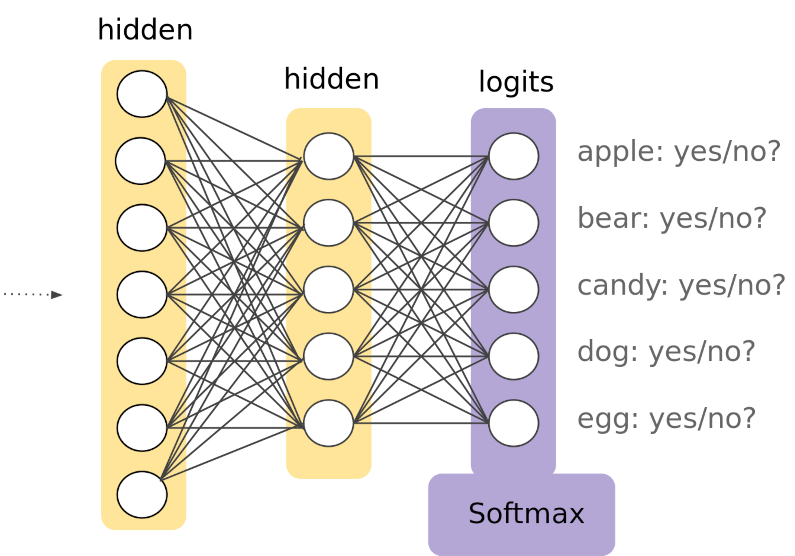

### Ztrátové funkce

Pro klasifikaci je často používaná křížová entropie. Binární křížovou entropii jsme již viděli v části věnované lineárním klasifikátorům:
\begin{equation}
J(w)=-\frac{1}{\#X}\sum_i (y_i\log(\hat{y}_i)-(1-y_i)\log(1-\hat{y}_i)),
\end{equation}
kde definujeme $0\log(0)=0$, tj. v limitním smyslu.

Pro klasifikaci do více tříd nejprve definujeme křížovou entropii:
\begin{equation}
H(y, \hat{y}) = -\sum_j (y_j\log(\hat{y}_{j}(x)),
\end{equation}
kde $y$ je vektor pravděpodobností k daným třídám a $\hat{y}$ je odhad modelu, index $j$ zde značí složky daných vektorů. Nyní definujeme ztrátovou funkci za celý dataset:
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i H(y_i, \hat{y}(x_i)),
\end{equation}
kde index $i$ je použit pro *i-tý* příklad z datasetu a jeho label.

Pro regresní úlohy se často používá formulace chyby ve smyslu nejmenších čtverců *MSE* (*Mean Squared Error*):
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i(y_i-\hat{y}_i)^2,
\end{equation}
případně *RMSE* (*Root Mean Squared Error*):
\begin{equation}
J(w)=\sqrt{\frac{1}{\#X}\sum_i(y_i-\hat{y}_i)^2},
\end{equation}
nebo ve smyslu *MAE* (*Mean Absolute Error*):
\begin{equation}
J(w)=\frac{1}{\#X}\sum_i |y_i-\hat{y}_i|.
\end{equation}

Poněkud komplikovanější myšlenka se skrývá v tzv. *Huber loss* funkci, která je navržena tak, aby se pro hodnoty argumentu větší než předepsaná hodnota chovala lineárně. Toto je výhodné pokud v datasetu existují tzv. *outlayers*, tedy odlehlé hodnoty, netypické příklady, které model hůře klasifikuje, tak jim při učení neuronové sítě dává menší váhu než v případě *MSE*. Funkci je možné definovat [viz zde](https://en.wikipedia.org/wiki/Huber_loss):

\begin{equation}
L_{\delta}(y, \hat{y}) =
\left\{
    \begin{array}{lr}
        \frac{(y-\hat{y})^2}{2}, & \text{když } |y-\hat{y}| \le 0 \\
        \delta(|y-\hat{y}|-\frac{\delta}{2}), & \text{jinak}
    \end{array}
\right\}.
\end{equation}
Na ukázce níže je tato funkce zakreslena, vyzkoušejte vliv $\delta$ na tvar funkce. Výslednou chybu získáme vysčítáním přes celý dataset, podobně jako v případě křížové entropie výše.

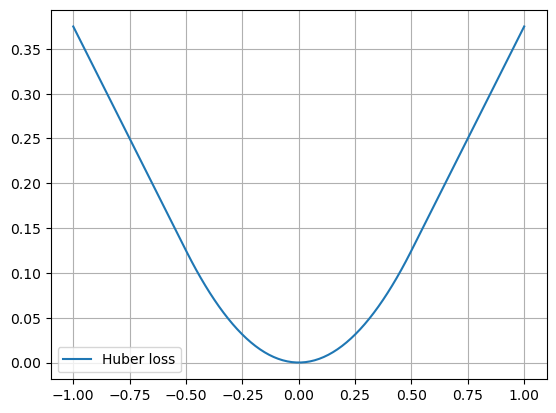

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def huber(x, delta):
  av = math.fabs(x)
  if av <= delta:
    return x**2/2
  else:
    return delta*(av-delta/2)
# hodnota delta
delta = 0.5
x = np.linspace(-1,1,100)
y = np. array([ huber(point, delta) for point in x ])
plt.plot(x,y, label='Huber loss')
plt.legend()
plt.grid()

**Důležitá poznámka**

Ve výše uvedených příkladech ztrátových (loss) funkcí dochází vždy ke sčítání přes celý tréninkový dataset. Obvykle se vezme jen část datasetu, tzv. *dávka* (**minibatch**) a udělá se krok danou optimalizační metodou, pak se vezme další krok a pak další. Když se projede celý dataset, tak mluvíme o **epoše učení**. Velikost dávky má vliv na rychlost a konvergenci učení (opět hyperparametr), obvykle je to nutno vyexperimentovat.

# Ukázkové úlohy - Keras

Pro praktickou implementaci použití neuronových sítí budeme používat framework [TensorFlow](https://www.tensorflow.org/) v kombinaci s nadstavbou [Keras](https://keras.io/). K obojímu na daných odkazech existují bohaté tutoriály.

## Klasifikace ručně psaných číslic - MNIST

Nejprve si ukážeme klasiku pro klasifikační úlohy. Klasifikace ručně psaných číslic na datasetu [MNIST](https://en.wikipedia.org/wiki/MNIST_database). Tento dataset je i součástí Tensorflow. Jednotlivé kroky sestrojení modelu budeme komentovat.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

2023-10-27 08:29:07.193661: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Nejprve jsme si naimportovali potřebné knihovny a v následující buňce načteme dataset. Dataset je již zamíchaný a rozdělený na trénovací a testovací dataset. Vidíme zde, jaké jsou rozměry trénovacího a testovacího datasetu a také to, že číslice jsou ve formě matic o rozměru *28x28* pixelů.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


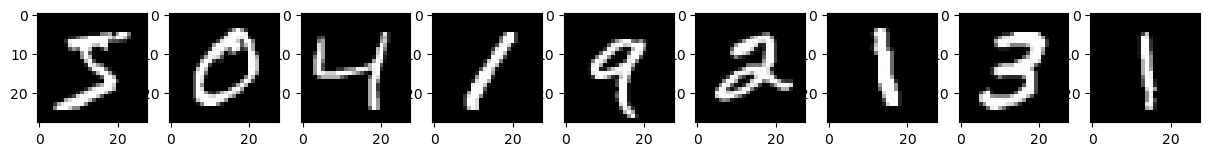

In [3]:
train_data, test_data = tf.keras.datasets.mnist.load_data()
X_tr,y_tr = train_data
X_test,y_test = test_data
print(f'{X_tr.shape}')
print(f'{y_tr.shape}')
print(f'{X_test.shape}')
print(f'{y_test.shape}')
fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
  ax.imshow(X_tr[index],cmap='gray')
plt.show()

V další buňce je provedena příprava dat na použití neuronové sítě. Nejprve jsme si udělali proměnnou, která určuje kolik je daných kategorií, máme totiž číslice 0 až 9. Dále si obrázky znormalizujeme. Protože se jedná o obrázky v odstínech šedi, tak v dané matici tvořící obrázek mohou být celočíselné hodnoty z intervalu $<0,255>$. Vydělením hodnotou $255$ došlo k normalizaci, v podstatě se jedná o *minmax škálování*.

Poté rozvineme matice příslušející jednotlivým příkladům z obou datasetů do vektorů. Dimenze těchto vektorů je $28 \cdot 28=784$. A na závěr převedeme labely na kategorické proměnné.

In [4]:
CATEGORIES = 10
# Normalizace <0,255> -> <0,1>
X_tr = X_tr/255.0
X_test = X_test/255.0
# Prevod matic 28*28 na vektory
X_tr_vec = X_tr.reshape(-1,28*28)
X_test_vec = X_test.reshape(-1,28*28)
print(X_tr_vec.shape)
print(X_test_vec.shape)
# prevod na kategoricke promenne
y_tr_cat = tf.keras.utils.to_categorical(y_tr, CATEGORIES)  # preved na matici vystupu [1] -> [0,1,0,0,0]
y_test_cat = tf.keras.utils.to_categorical(y_test, CATEGORIES)

(60000, 784)
(10000, 784)


V následující buňce je ukázáno vytvoření modelu *MLP*. Udělali jsme si tovární funkci, která vrací výsledný model. Použitý model neuronové sítě má dvě skryté vrstvy, každá z nich má $32$ jednotek a je v nich použita aktivační funkce *ReLU*. Výstupní vrstva má $10$ výstupů, viz proměnná *CATEGORIES*, a je v ní použita aktivační funkce funkce *Softmax*. Dále je nastavena *loss funkce*, což je křížová entropie, zde *categorical_crossentropy*, bude použita optimalizační metoda *ADAM* (Adaptive Moment Estimation), více viz princip [zde](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/) a nebo [podrobněji](https://arxiv.org/abs/1412.6980). Pro učení je třeba často sledovat různé metriky. V tomto příkladu sledujeme **accuracy**.

Metoda vrací model, který potom naučíme pomocí metody *fit*. Použit je předepsaný počet *epoch učení*, tj.průchodů celým datasetem. Dále je z důvodu sledování toho, jak se model učí, dáno 10% vzorků (*validation_split*) na stranu a nepoužijí se při učení. Tímto pak můžeme sledovat to, jak se model chová z hlediska sledovaných metrik na neznámých příkladech.

In [5]:
from tensorflow.keras import models, layers
def get_model(units=[16,16], dropouts=[0.0,0.0], activations=["tanh","relu"]):
  """Lehce tunitelný model pomocí sekvenčního API"""
  model = models.Sequential()
  model.add(layers.Dense(units = units[0], input_shape = (784,) , activation = activations[0]))
  if dropouts[0] > 0: # když je předepsán dropout
    model.add(layers.Dropout(dropouts[0]))
  model.add(layers.Dense(units = units[1], activation=activations[1]))
  if dropouts[1] > 0: # když je předepsán dropout
    model.add(layers.Dropout(dropouts[1]))
  model.add(layers.Dense(CATEGORIES, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


EPOCHS = 10
model = get_model()
history = model.fit(X_tr_vec, y_tr_cat, epochs=EPOCHS, validation_split=0.1, shuffle=True)

Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4821 - accuracy: 0.8675 - val_loss: 0.2027 - val_accuracy: 0.9430
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2217 - accuracy: 0.9365 - val_loss: 0.1787 - val_accuracy: 0.9488
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1869 - accuracy: 0.9455 - val_loss: 0.1568 - val_accuracy: 0.9575
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1650 - accuracy: 0.9506 - val_loss: 0.1495 - val_accuracy: 0.9573
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1508 - accuracy: 0.9547 - val_loss: 0.1451 - val_accuracy: 0.9612
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9579 - val_loss: 0.1441 - val_accuracy: 0.9593
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1340 - accuracy: 0.9593 - val_loss: 0.1388 - val_accuracy:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


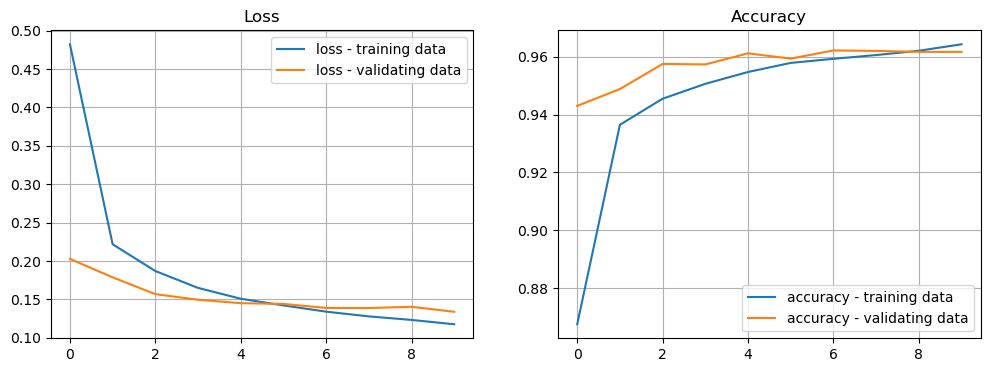

In [7]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)

axis[0].plot(history.history['loss'], label='loss - training data')
axis[0].plot(history.history['val_loss'], label='loss - validating data')
axis[0].grid()
axis[0].set_title('Loss')
axis[0].legend()

axis[1].plot(history.history['accuracy'], label='accuracy - training data')
axis[1].plot(history.history['val_accuracy'], label='accuracy - validating data')
axis[1].grid()
axis[1].set_title('Accuracy')
axis[1].legend()



V buňce níže je vypsána matice záměn mezi číslicemi na testovacíh datech, což je relevantní pro zhodnocení modelu. Všimněte si hodnoty na pátém řádku v posledním sloupci, která nám říká, že klasifikátor často zaměnil číslici 4 za 9. Obdobně můžeme zjistit i další časté záměny.
Dále je zde určena *accuracy*, která obvykle bývá nižší než na trénovacích datech.

In [8]:
from sklearn.metrics import confusion_matrix # matice zamen
yhat = model.predict(X_test_vec)
vysl = np.argmax(yhat,axis=1)
cm = confusion_matrix(y_test, vysl)
print(cm)
print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test_vec, y_test_cat)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 6ms/step
[[ 958    0    2    2    1    6    6    1    2    2]
 [   0 1111    5    0    1    0    1    5   12    0]
 [   4    0  976   19   10    0    2    7   13    1]
 [   2    1   11  960    1   13    0    6    9    7]
 [   1    0    9    1  921    1    4    4    2   39]
 [   4    1    0   25    3  828    9    5    7   10]
 [   6    1    4    0    4    9  930    0    4    0]
 [   1    4   11   15    3    0    0  980    1   13]
 [   5    2    7   12    5    7    5    9  916    6]
 [   4    4    1   12   17    3    0   12    4  952]]
Ohodnoceni na testovacich datech
313/313 [==============================] - 0s 1ms/step - loss: 0.1564 - accuracy: 0.9532
test loss, test acc: [0.15636387467384338, 0.9531999826431274]


**Samostatná práce**

Vyzkoušejte vliv při deseti epochách následujících parametrů
* **batchsize**
* Dalších parametrů (aktivační funkce, dropout, atd).

In [9]:
EPOCHS = 10
histories = []
for batch in [32,64,128,256]:
  model = get_model()
  history = model.fit(X_tr_vec, y_tr_cat, epochs=EPOCHS, validation_split=0.1, batch_size=batch, shuffle=True, verbose=0)
  histories.append((history,batch))

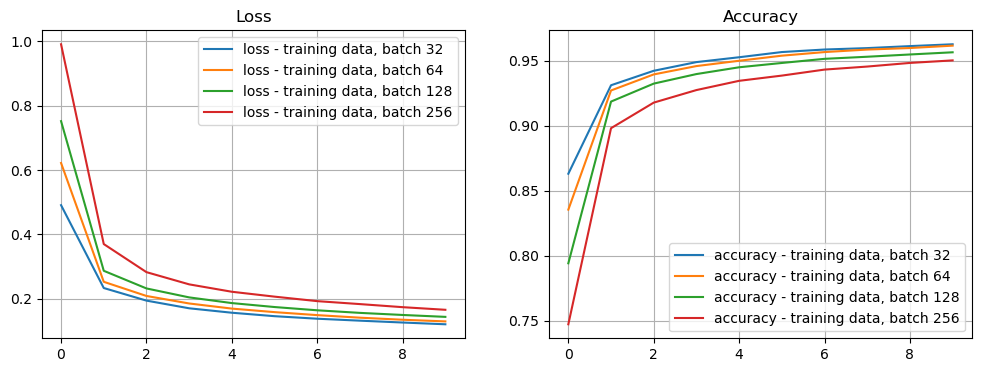

In [10]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)

for history, batch in histories:
  axis[0].plot(history.history['loss'], label=f'loss - training data, batch {batch}')
  axis[1].plot(history.history['accuracy'], label=f'accuracy - training data, batch {batch}')
axis[0].grid()
axis[0].set_title('Loss')
axis[0].legend()
axis[1].grid()
axis[1].set_title('Accuracy')
axis[1].legend()


### Komplikovanější přístup - OOP

Pokud chceme tvořit komplexnější modely a různě vrstvy pospojovávat či vynechávat, tak můžeme použít buď funkcionální přístup [Functional API](https://www.tensorflow.org/guide/keras/functional_api) nebo [OOP](https://www.tensorflow.org/tutorials/customization/custom_layers).Dále lze model obohatit o možnost responze na různé "události". Stačí doplnit [callbacky](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).

In [11]:
from keras.api._v2.keras import activations
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# vytvoreni custom vrstvy
class DroppedLayer(Layer):
  """Vlastni custom vrstva - dens+dropout+regularizace vystupu"""
  def __init__(self,input_shape,units = 16, activation="relu", dropout=0.1, l2_reg=0.001):
    super(DroppedLayer, self).__init__()
    self.units=units
    self.activation=activation
    self.dropout=dropout
    self.l2_reg=l2_reg

    self.dense=Dense(units=self.units, activation=self.activation, activity_regularizer=regularizers.L2(self.l2_reg), input_shape=input_shape)
    self.dropout=Dropout(self.dropout, input_shape=(self.units,))
    print(f"Create DroppedLayer:units {self.units},activation {self.activation},dropout {self.dropout}")

  def call(self, input, training=False):
    """Funkcionalni pristup"""
    x=self.dense(input)
    if training: # pouzij dropout jen kdyz se uci
      x=self.dropout(x)
    return x

#vytvoreni custom modelu - kdyz to potrebuji mit nejak specialne pospojovane - napr. UNET, ResUnet
class MLPModel(Model):
  def __init__(self,input_shape, categories=10, units=[16,32], activations=["relu","relu"], dropouts=[0.1,0], l2_regs=[0,0.001]):
    super(MLPModel, self).__init__()
    self.inner_layers=[] #sem si ukladam jednotlive stackovane vrstvy
    self.categories=categories
    self.units=units
    self.activations=activations
    self.dropouts=dropouts
    self.l2_regs=l2_regs
    i_shape=input_shape[0]
    # zde projizdim seznamy vstupnich parametru a sestavuji si jednotlive vrstvy
    for u,a,d,l2 in zip(self.units, self.activations, self.dropouts,self.l2_regs ):
      layer = DroppedLayer(input_shape=(i_shape,None), units=u, activation=a, dropout=d, l2_reg=l2) # instancuj  vrstvu
      self.inner_layers.append(layer) # dej si vrstvu do seznamu
      i_shape=u # pocet jednotek vrstvy je rozmer vstupu vrstvy nasledujici
    self.output_layer = Dense(units=self.categories, activation="softmax", input_shape=(i_shape,)) # vystupni vrstva se softmax

  def call(self, input):
    """Seskladani vystupu z jednotlivych vrstev"""
    x=self.inner_layers[0](input)
    for layer in self.inner_layers[1:]:
      x=layer(x)
    return self.output_layer(x)
########################Použití######################
model = MLPModel(input_shape=(784,),categories=10, units=[16,32,16], activations=["relu","relu","tanh"], dropouts=[0.1,0,0.1], l2_regs=[0,0.001,0.001] )
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacky = [
    EarlyStopping(patience=2, verbose=1), # kdyz se dve iterace po sobe nezlepsi ukazatel (defaultne val_loss), tak stopni
             ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.tf') # ukladani modelu - necham to ukladat kazdou epochu, ale lze i jinak
             ]


history = model.fit(X_tr_vec, y_tr_cat, epochs=10, validation_split=0.1, callbacks=callbacky, shuffle=True)
# zhodnocení
print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test_vec, y_test_cat)
print("test loss, test acc:", results)

Create DroppedLayer:units 16,activation relu,dropout <keras.layers.regularization.dropout.Dropout object at 0x7fc306f449d0>
Create DroppedLayer:units 32,activation relu,dropout <keras.layers.regularization.dropout.Dropout object at 0x7fc2ec104dd0>
Create DroppedLayer:units 16,activation tanh,dropout <keras.layers.regularization.dropout.Dropout object at 0x7fc304ece310>
Epoch 1/10
1681/1688 [============================>.] - ETA: 0s - loss: 0.6611 - accuracy: 0.8187INFO:tensorflow:Assets written to: model.01-0.26.tf/assets


INFO:tensorflow:Assets written to: model.01-0.26.tf/assets


1688/1688 [==============================] - 6s 3ms/step - loss: 0.6597 - accuracy: 0.8191 - val_loss: 0.2566 - val_accuracy: 0.9378
Epoch 2/10
1685/1688 [============================>.] - ETA: 0s - loss: 0.3674 - accuracy: 0.9004INFO:tensorflow:Assets written to: model.02-0.20.tf/assets


INFO:tensorflow:Assets written to: model.02-0.20.tf/assets


1688/1688 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.9005 - val_loss: 0.2042 - val_accuracy: 0.9493
Epoch 3/10
1683/1688 [============================>.] - ETA: 0s - loss: 0.3245 - accuracy: 0.9100INFO:tensorflow:Assets written to: model.03-0.21.tf/assets


INFO:tensorflow:Assets written to: model.03-0.21.tf/assets


1688/1688 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.9100 - val_loss: 0.2121 - val_accuracy: 0.9447
Epoch 4/10
1669/1688 [============================>.] - ETA: 0s - loss: 0.2963 - accuracy: 0.9167INFO:tensorflow:Assets written to: model.04-0.18.tf/assets


INFO:tensorflow:Assets written to: model.04-0.18.tf/assets


1688/1688 [==============================] - 5s 3ms/step - loss: 0.2964 - accuracy: 0.9167 - val_loss: 0.1808 - val_accuracy: 0.9527
Epoch 5/10
1661/1688 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.9220INFO:tensorflow:Assets written to: model.05-0.17.tf/assets


INFO:tensorflow:Assets written to: model.05-0.17.tf/assets


1688/1688 [==============================] - 4s 3ms/step - loss: 0.2817 - accuracy: 0.9221 - val_loss: 0.1727 - val_accuracy: 0.9543
Epoch 6/10
1687/1688 [============================>.] - ETA: 0s - loss: 0.2744 - accuracy: 0.9234INFO:tensorflow:Assets written to: model.06-0.18.tf/assets


INFO:tensorflow:Assets written to: model.06-0.18.tf/assets


1688/1688 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.9234 - val_loss: 0.1763 - val_accuracy: 0.9527
Epoch 7/10
1679/1688 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.9262INFO:tensorflow:Assets written to: model.07-0.17.tf/assets


INFO:tensorflow:Assets written to: model.07-0.17.tf/assets


1688/1688 [==============================] - 5s 3ms/step - loss: 0.2619 - accuracy: 0.9262 - val_loss: 0.1653 - val_accuracy: 0.9537
Epoch 8/10
1680/1688 [============================>.] - ETA: 0s - loss: 0.2538 - accuracy: 0.9292INFO:tensorflow:Assets written to: model.08-0.16.tf/assets


INFO:tensorflow:Assets written to: model.08-0.16.tf/assets


1688/1688 [==============================] - 4s 2ms/step - loss: 0.2536 - accuracy: 0.9293 - val_loss: 0.1641 - val_accuracy: 0.9563
Epoch 9/10
1679/1688 [============================>.] - ETA: 0s - loss: 0.2437 - accuracy: 0.9319INFO:tensorflow:Assets written to: model.09-0.17.tf/assets


INFO:tensorflow:Assets written to: model.09-0.17.tf/assets


1688/1688 [==============================] - 5s 3ms/step - loss: 0.2441 - accuracy: 0.9319 - val_loss: 0.1688 - val_accuracy: 0.9548
Epoch 10/10
1676/1688 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.9334INFO:tensorflow:Assets written to: model.10-0.17.tf/assets


INFO:tensorflow:Assets written to: model.10-0.17.tf/assets


1688/1688 [==============================] - 5s 3ms/step - loss: 0.2410 - accuracy: 0.9334 - val_loss: 0.1678 - val_accuracy: 0.9560
Epoch 10: early stopping
Ohodnoceni na testovacich datech
313/313 [==============================] - 1s 4ms/step - loss: 0.1857 - accuracy: 0.9496
test loss, test acc: [0.18567147850990295, 0.9495999813079834]


**Samostatná práce**

Následující data jsou různé funkce *sinus* a "*signum*", viz obr.
Udělejte jednoduchý model (s jednou vrstvou) MLP pro klasifikaci.

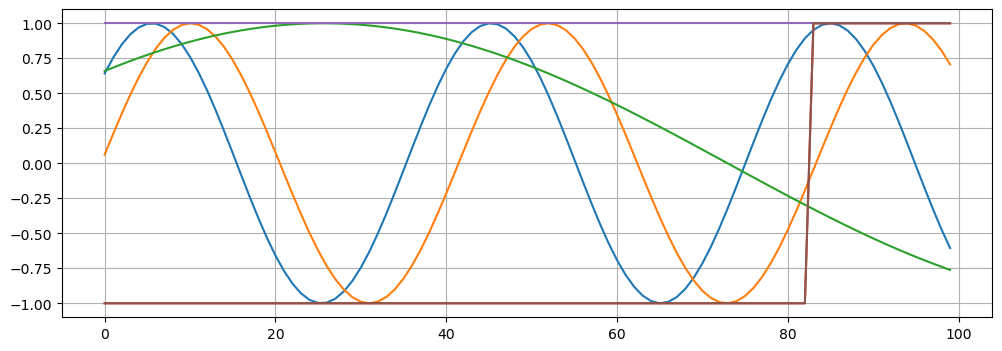

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
# generovani dat
EXAMPLES=10000
DIM=100
X=np.zeros((EXAMPLES, DIM))
y=np.zeros( EXAMPLES) # defaultne trida 0
x_in=np.linspace(0,10,DIM)
for row in range(EXAMPLES//2):
  X[row,:]=np.sin((2*np.random.rand()+0.1)*x_in+np.random.rand())
  y[row]=1 # trida

for row in range(EXAMPLES//2,EXAMPLES):
  br = np.random.randint(0,DIM)
  X[row,:br]=-1
  X[row,br:]=+1


plt.plot(X[0,:])
plt.plot(X[1,:])
plt.plot(X[2,:])

plt.plot(X[-1,:])
plt.plot(X[-2,:])
plt.plot(X[-3,:])

plt.grid()


**Poznámka**
Lze vidět, že hodnoty jsou v intervalu $<-1,1>$ není třeba je škálovat.

In [13]:
# Pokyny
# nezapomente data rozdelit na testovaci a trenovaci
# zakodujte 0->[1,0], 1->[0,1] one-hot
###reseni smazat
from tensorflow.keras import models, layers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_cat = tf.keras.utils.to_categorical(y_train, 2)  # preved na matici vystupu [0] -> [1,0], [1] -> [0,1]
y_test_cat = tf.keras.utils.to_categorical(y_test, 2)

def get_model(units=16, dropouts=0.1, activations="relu"):
  """Lehce tunitelný model pomocí sekvenčního API"""
  model = models.Sequential()
  model.add(layers.Dense(units = units, input_shape = (DIM,) , activation = activations))
  if dropouts > 0: # když je předepsán dropout
    model.add(layers.Dropout(dropouts))

  model.add(layers.Dense(2, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

EPOCHS = 10
model = get_model()
history = model.fit(X_train, y_train_cat, epochs=20, validation_split=0.1, shuffle=True)
print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test, y_test_cat)
print("test loss, test acc:", results)

Epoch 1/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0998 - accuracy: 0.9621 - val_loss: 0.0520 - val_accuracy: 0.9688
Epoch 2/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9807 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoch 3/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9890 - val_loss: 0.0248 - val_accuracy: 0.9950
Epoch 4/20
225/225 [==============================] - 1s 2ms/step - loss: 0.0260 - accuracy: 0.9943 - val_loss: 0.0212 - val_accuracy: 0.9950
Epoch 5/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.9949 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 6/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0182 - accuracy: 0.9953 - val_loss: 0.0150 - val_accuracy: 0.9950
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.0134 - val_accuracy: 0.9950
Epoch 

## Autoencoder
Klíčové v tomto modelu je zužování sítě, až se dostaneme do hrdla (*latentní reprezentace*), které vlastně slouží pro shrnutí podstatných rysů dat. Model se skládá ze dvou částí **encoder** a **decoder**.
Používáme v situacích.
*   Detekce anomálií. Jedná se v podstatě o regresní model. Kde učím síť reprodukovat vstup, tedy $X=X, y=X$. Trénovací množina obsahuje **normální data**. Síť se je naučí reprodukovat, pokud dostane jiná data, tak regrese selže a mohu na základě chyby rozhodnout, že se jedná o poruchu.
*  Odstranění šumu. Vstupem jsou zašumněná data a učím model tak, aby na výstupu byla data bez šuma, tedy $X=X_{noise}, y=X_{clear}$.
* Nelineární redukce dimensionality. Učím podobně jako pro detekci anomálií, pak ale naučený model rozpojím apoužívám encoder pro transformaci dat.


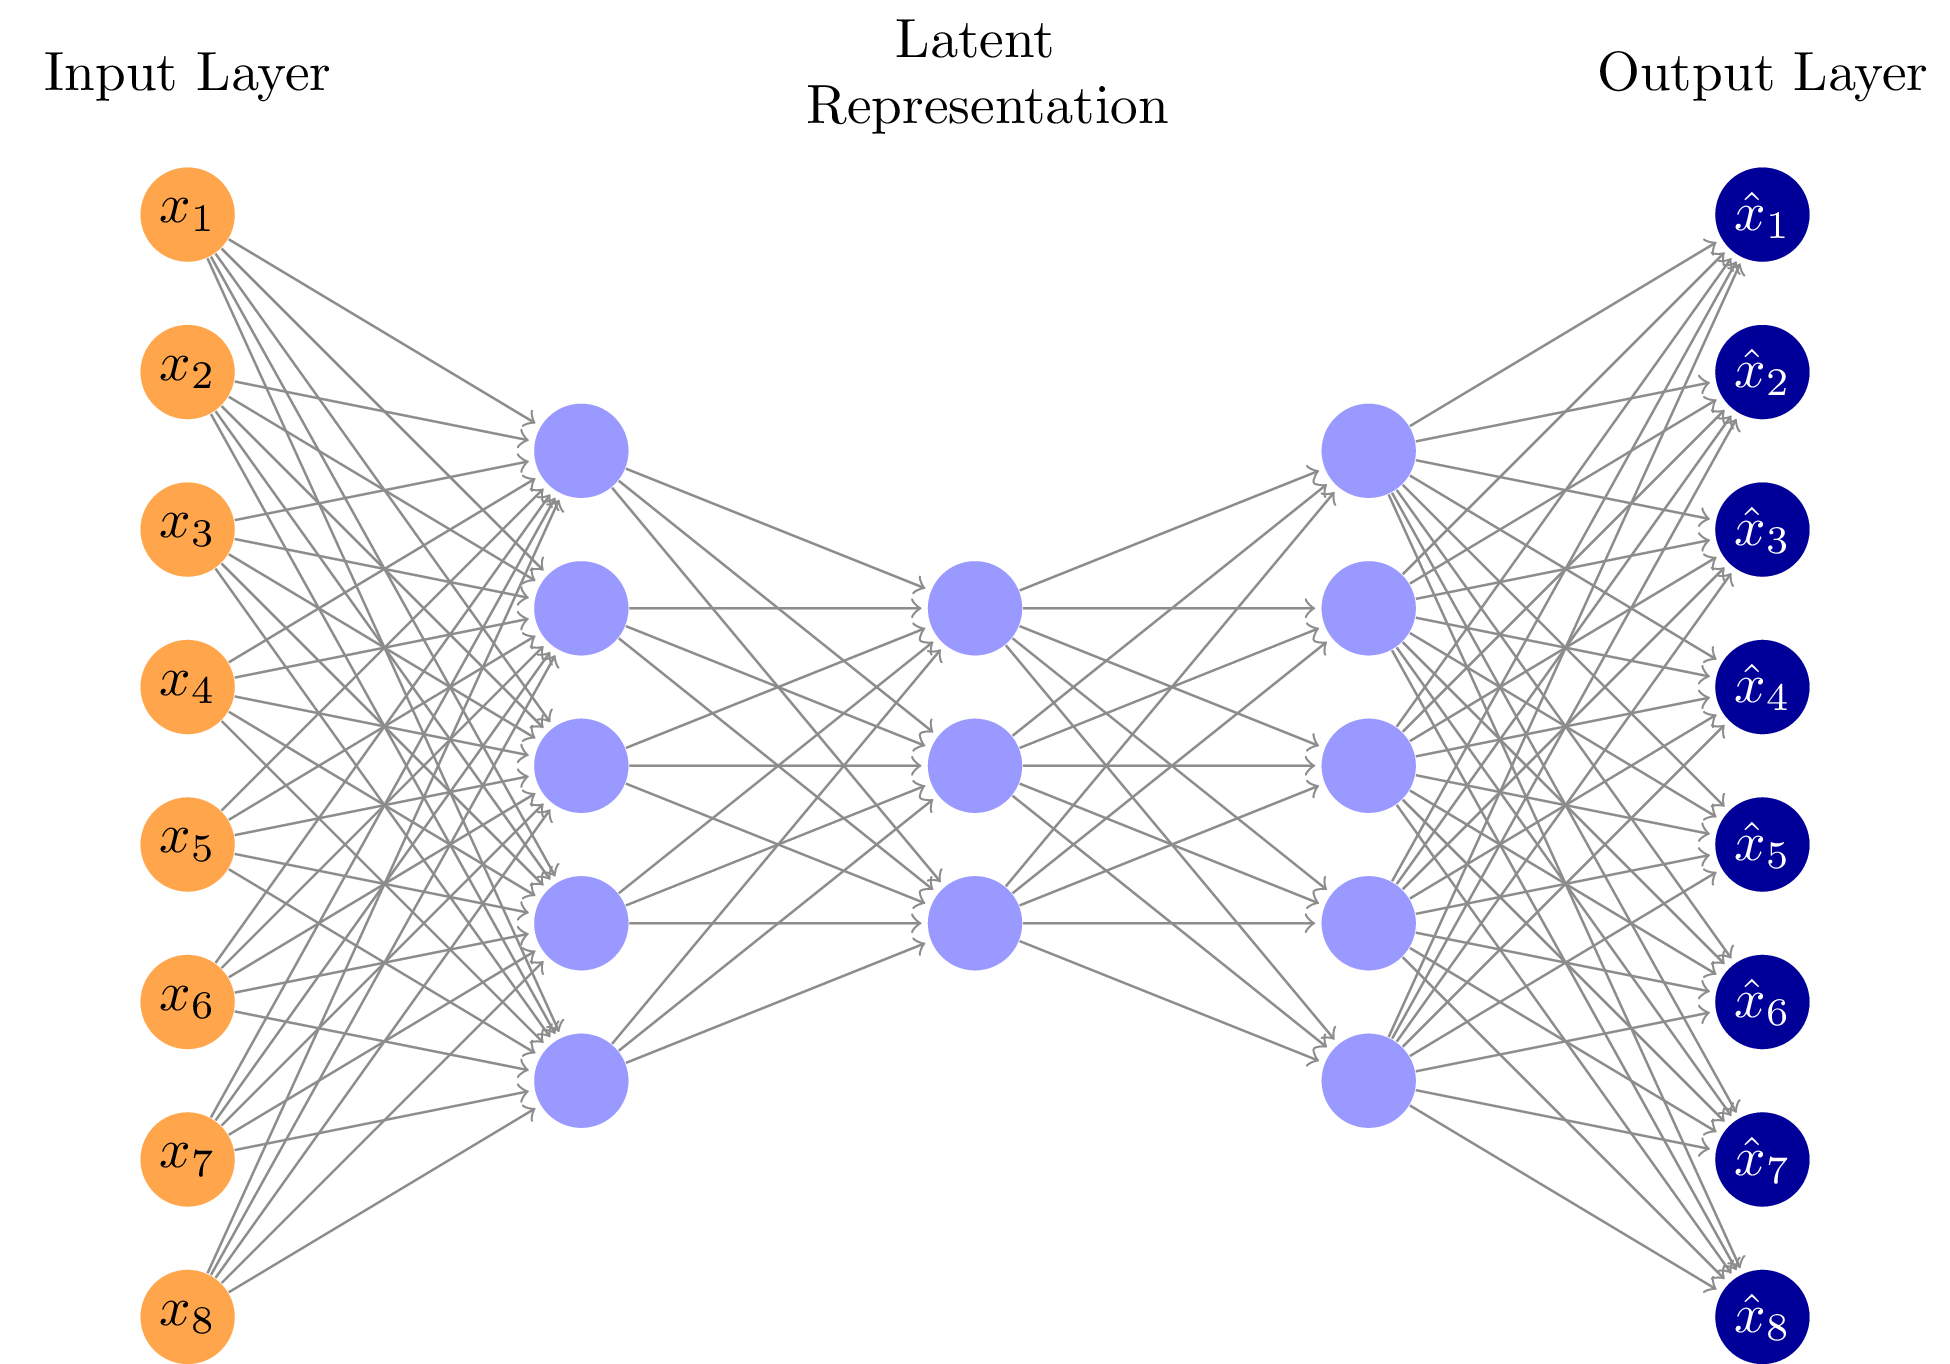

Zdroj: https://tikz.net/janosh/autoencoder.png

Nejprve pripravim data

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
# generovani dat
EXAMPLES=10000
TEST_EXAMPLES=100
DIM=100
X=np.zeros((EXAMPLES, DIM))
X_mixed=np.zeros((TEST_EXAMPLES, DIM))
y_mixed=np.zeros(TEST_EXAMPLES)
x_in=np.linspace(0,10,DIM)
# generovani "dobrych" dat
for row in range(EXAMPLES):
  X[row,:]=np.sin((2*np.random.rand()+0.1)*x_in+np.random.rand())

# generovani smisenych dat - pro ohodnoceni uspesnosti potrebuji znat co tam je
for row in range(TEST_EXAMPLES//2):
  X_mixed[row,:]=np.sin((2*np.random.rand()+0.1)*x_in+np.random.rand())
for row in range(TEST_EXAMPLES//2,TEST_EXAMPLES):
  br = np.random.randint(0,DIM)
  X_mixed[row,:br]=-1
  X_mixed[row,br:]=+1



Vytvořím model a naučím ho.

In [15]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

class AutoencoderMLP(Model):
    """Model obsahuje dva submodely encoder a decoder"""
    def __init__(self, input_size, L=[64,32], D=16, activation="tanh"):
        super(AutoencoderMLP, self).__init__()
        L.append(D)  # přidej si do parametrů encoderu i dimenzi hrdla
        self.encoder = Sequential()
        self.encoder.add(Input(shape=(input_size,))) # pridej vstup do encoderu
        for u in L: # sestav model na základě parametrů
            self.encoder.add(Dense(units=u, activation=activation))
        #posledni pridana vrstva do encoderu je hrdlo
        print(self.encoder.summary())
        self.decoder = Sequential()
        self.decoder.add(Input(shape=(L[-1],)))
        L.sort()  # otoc poradi
        for u in L[1:]:# nepouzij latent dimension pri generovani vrstev
            self.decoder.add(Dense(units=u, activation=activation))
        self.decoder.add(Dense(units=input_size, activation="linear"))
        print(self.decoder.summary())

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = AutoencoderMLP(input_size=100)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) # pozor je pouzita jina loss funkce, jde mi vlastne o regresi
history = model.fit(X, X,epochs=20, shuffle=True)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                6464      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
Total params: 9,072
Trainable params: 9,072
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)        

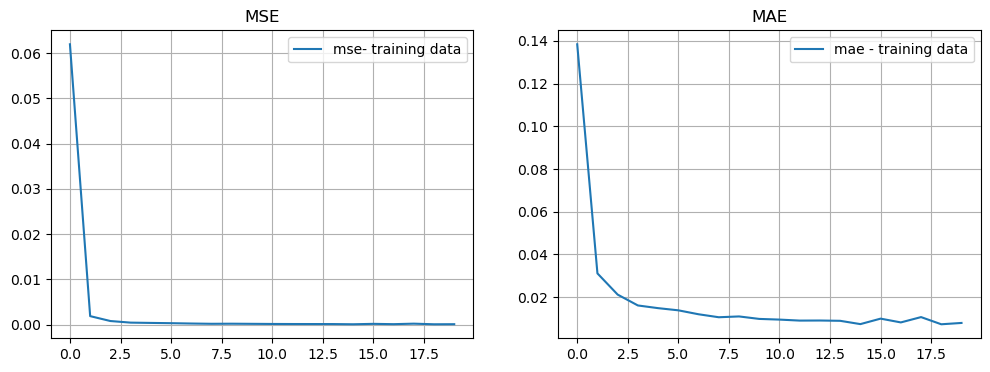

In [16]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)

axis[0].plot(history.history['mse'], label='mse- training data')
axis[0].grid()
axis[0].set_title('MSE')
axis[0].legend()

axis[1].plot(history.history['mae'], label='mae - training data')
axis[1].grid()
axis[1].set_title('MAE')
axis[1].legend()

Určím si distribuci chyby na dobrých datech.

313/313 [==============================] - 1s 2ms/step


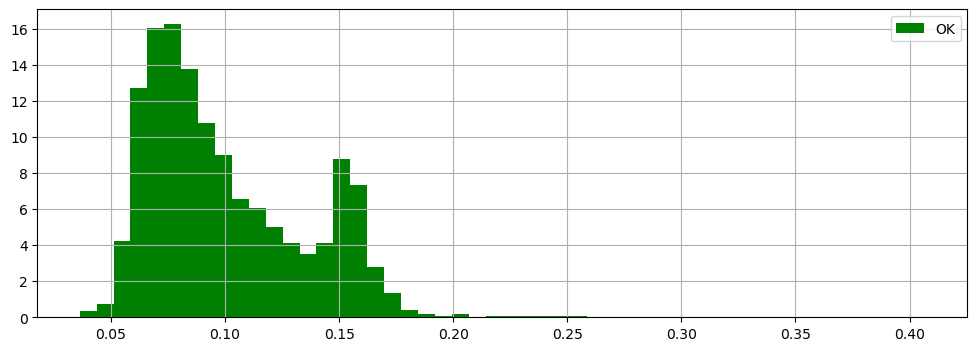

In [17]:
X_hat_train = model.predict(X)
mse_train=np.sqrt(np.sum((X-X_hat_train)**2, axis=1))
plt.hist(mse_train, bins=50, density=True,color="green", label="OK")
plt.legend()
plt.grid()

Určím si distribuci chyby na mixed datech.

4/4 [==============================] - 0s 2ms/step


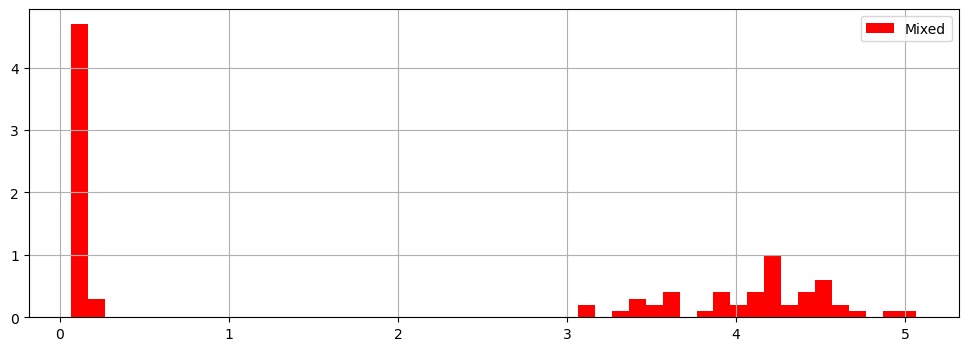

In [18]:
X_hat_test = model.predict(X_mixed)
mse_test=np.sqrt(np.sum((X_mixed-X_hat_test)**2, axis=1))
plt.hist(mse_test, bins=50, density=True,color="red",label="Mixed")
plt.legend()
plt.grid()

**Samostatný úkol asi na doma**

Implementujte určení **thresholdu** z trénovacích dat buď pomocí $\mu+3\sigma$, nebo z testovacích (validačních dat) pomocí [roc-auc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), viz např [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics).

In [19]:
# zde se snažte

## Regresní model - MLP


Jako další si ukážeme použití neuronových sítí pro úlohu regrese. Jako vstupní data budeme používat informace o počtu narozených dětí v minulosti a budeme předpovídat počet dětí v budoucnosti. Předpokládejme, že máme k dispozici dataset, který je součástí tohoto výukového matriálu a je uložen v adresáři *data* spolu s tímto výukovým materiálem. Případně je ke stažení [zde](https://drive.google.com/file/d/1DXJYtrCG8HelVRRq7ZafHKgk6q3HVDNu/view?usp=sharing).

Nejprve si naimportujeme potřebné balíčky.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

 Pokud používáte Google Collab, tak připojíme Google Disk, viz [zde](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd).

In [22]:
# Pokud používáte Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
# toto pokud máte nahraná data na Google Colab
#data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML-CVUT/NeuronoveSite/data/narozeni.csv", index_col=0, parse_dates=['Date'])  # nacteni dat
# toto pokud si nahraju data do uloziste relace, nebo nekam, kde na ne uvidim
data = pd.read_csv("narozeni.csv",index_col=0, parse_dates=['Date']) # pripadne musite upravit cestu
data.rename(columns={"Number of daily births in Quebec, Jan. 01, 1977 to Dec. 31, 1990": "Pocet"}, inplace=True)
data.head(14)

Pocet
Date             
1977-01-01    208
1977-01-02    241
1977-01-03    274
1977-01-04    256
1977-01-05    294
1977-01-06    281
1977-01-07    251
1977-01-08    230
1977-01-09    240
1977-01-10    249
1977-01-11    272
1977-01-12    270
1977-01-13    281
1977-01-14    295

#### Průzkum dat

Když se na data podíváme, tak vidíme, že počet narozených dětí má jak trendovou složku, tak i periodickou, tedy v průběhu roku se rodí v různých měsících různý počet dětí. Na dalších buňkách vidíme, že dokonce je vliv i na úrovni dnů v týdnu.

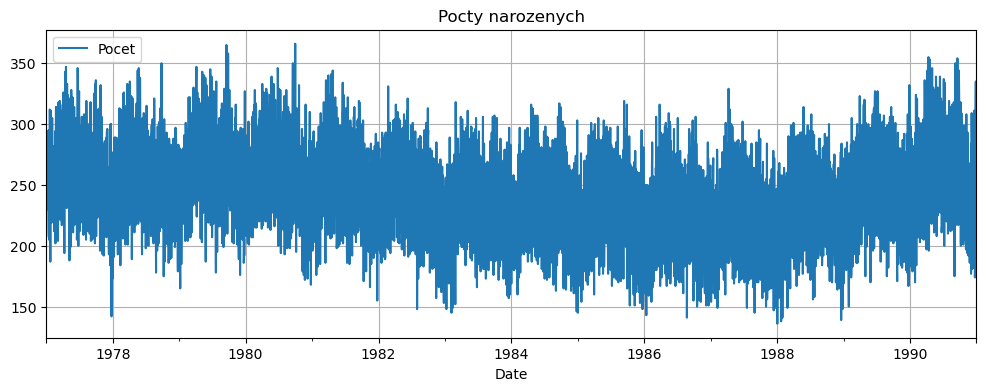

In [24]:
data.plot(title='Pocty narozenych')
plt.grid()

<Axes: >

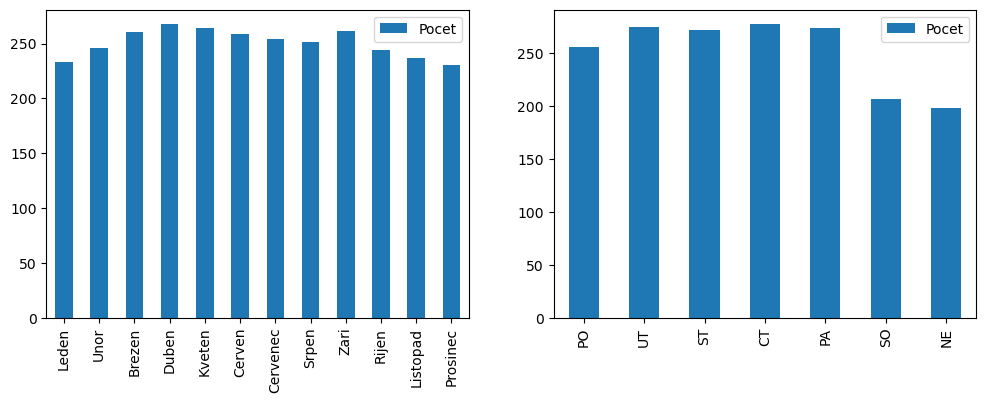

In [25]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)

mesicne = data.groupby(data.index.month).mean()  # seskup dle mesicu a vem prumer
mesicne.index = ['Leden', 'Unor', 'Brezen', 'Duben', 'Kveten', 'Cerven', 'Cervenec', 'Srpen', 'Zari', 'Rijen',
                     'Listopad', 'Prosinec']
mesicne.plot.bar(ax=axis[0])

tydne = data.groupby(data.index.weekday).mean()  # dle tydnu
tydne.index = ["PO", "UT", "ST", "CT", "PA", "SO", "NE"]
tydne.plot.bar(ax=axis[1])


#### Vytvoření modelu

V dalším budeme modelovat týdení periodicitu.
Vstupem modelu budou počty narozených za nějaké časové okno $w$ a výstupy modelu predikce na budoucí období, opět o délce $w$. Rozdělíme tedy dataset na takovéto vektory, kdy posun okna *step* volíme jedna. Tímto nám vznikne soubor vektorů, které složíme do matice. Podobně postupujeme pro výstupy sítě, kde ovšem používáme časový posun daný délkou okna.



In [26]:
X = []
y = []
w = 7 # delka okna
step = 1 # posun okna, default 1 (pokud udelam jiny posun, pak pri vyhodnocovani modelu - az budu prevadet matice zpet na hodnoty, tak se s tim budu prat)
narozeni = data.values.flatten()
for i in range(0, len(narozeni)-2*w, step):
  X.append(narozeni[i:i+w])
  y.append(narozeni[i+w:i+2*w])
X = np.array(X)
y = np.array(y)
print("Vstupy X:")
print(X[:7,:])
print("*"*20)
print("Pozadovane vystupy y:")
print(y[:4,:])

Vstupy X:
[[208 241 274 256 294 281 251]
 [241 274 256 294 281 251 230]
 [274 256 294 281 251 230 240]
 [256 294 281 251 230 240 249]
 [294 281 251 230 240 249 272]
 [281 251 230 240 249 272 270]
 [251 230 240 249 272 270 281]]
********************
Pozadovane vystupy y:
[[230 240 249 272 270 281 295]
 [240 249 272 270 281 295 213]
 [249 272 270 281 295 213 205]
 [272 270 281 295 213 205 263]]


V následující buňce rozdělíme data na tréninková a testovací, bez promíchávání v poměru 70% trénovací a zbytek testovací. Šlo by samozřejmě použít některou z technik vícenásobné validace pro časové řady [zde](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). A nakonec data normalizujeme.

In [27]:
# rozdeleni na treninkova a testovaci data a jejich normalizace
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pomer = 0.7
index_tr = int(len(narozeni)/step*pomer)
X_tr, y_tr = X[:index_tr], y[:index_tr]
X_test, y_test = X[index_tr:],y[index_tr:]
# normalizace - standardizace dat
scaler =  StandardScaler() #MinMaxScaler() # muzete experimentovat vliv
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)
y_tr = scaler.transform(y_tr)
y_test = scaler.transform(y_test)

Na ukázce kódu níže dojde k naučení modelu. Všimněte si, že na výstupu je použita lineární aktivační funkce. Sledované metriky jsou *MSE* a *MAE*, jejich definice viz výše.

In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers

def get_model():
  model = models.Sequential()
  model.add(layers.Dense(units = 32, input_shape = (w,) , activation = 'relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(units = 32, activation='relu'))
  model.add(layers.Dense(w, activation='linear'))
  model.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae'])
  return model


EPOCHS = 20
model = get_model()
history = model.fit(X_tr, y_tr, verbose = 1, epochs=EPOCHS, validation_split=0.1)

Epoch 1/20
101/101 [==============================] - 1s 4ms/step - loss: 0.6367 - mse: 0.6367 - mae: 0.6389 - val_loss: 0.5159 - val_mse: 0.5159 - val_mae: 0.5666
Epoch 2/20
101/101 [==============================] - 0s 3ms/step - loss: 0.3980 - mse: 0.3980 - mae: 0.4982 - val_loss: 0.3984 - val_mse: 0.3984 - val_mae: 0.4897
Epoch 3/20
101/101 [==============================] - 0s 3ms/step - loss: 0.3616 - mse: 0.3616 - mae: 0.4720 - val_loss: 0.3672 - val_mse: 0.3672 - val_mae: 0.4652
Epoch 4/20
101/101 [==============================] - 0s 3ms/step - loss: 0.3462 - mse: 0.3462 - mae: 0.4615 - val_loss: 0.3516 - val_mse: 0.3516 - val_mae: 0.4521
Epoch 5/20
101/101 [==============================] - 0s 3ms/step - loss: 0.3389 - mse: 0.3389 - mae: 0.4569 - val_loss: 0.3443 - val_mse: 0.3443 - val_mae: 0.4460
Epoch 6/20
101/101 [==============================] - 0s 4ms/step - loss: 0.3354 - mse: 0.3354 - mae: 0.4533 - val_loss: 0.3447 - val_mse: 0.3447 - val_mae: 0.4482
Epoch 7/20
101/1

Nyní vykreslíme sledované metriky a vidíme, že proces učení je uspokojivý. Obě křivky klesly a jsme v ploché oblasti, nebudeme tedy přidávat další epochy pro učení.

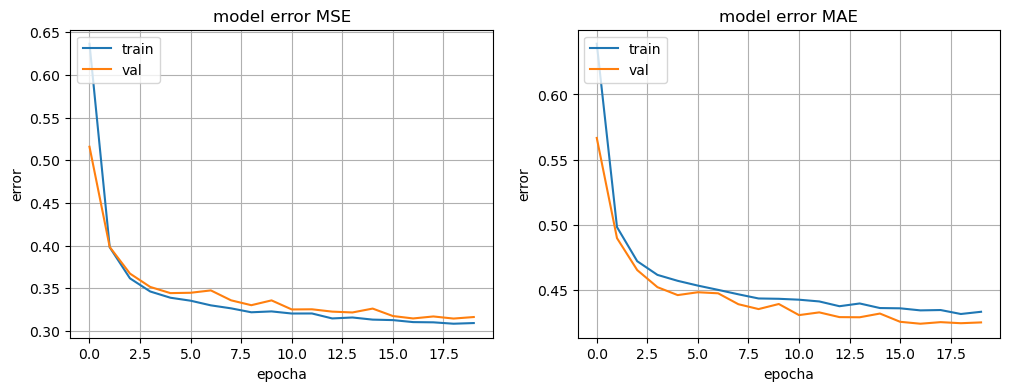

In [29]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['mse'])
axis[0].plot(history.history['val_mse'])
axis[0].set_title('model error MSE')
axis[0].set_ylabel('error')
axis[0].set_xlabel('epocha')
axis[0].legend(['train', 'val'], loc='upper left')
axis[0].grid()

axis[1].plot(history.history['mae'])
axis[1].plot(history.history['val_mae'])
axis[1].set_title('model error MAE')
axis[1].set_ylabel('error')
axis[1].set_xlabel('epocha')
axis[1].legend(['train', 'val'], loc='upper left')
axis[1].grid()

V další ukázce porovnáme predikci s realitou. Spočteme predikce za celou testovací množinu a přeškálujeme je do původních hodnot. Obdobně přeškálujeme do původních hodnot testovací data, protože v kódu výše jsme si původní data přepsali škálovanými (!). Nakonec spočteme chybu v obou metrikách za všechny příklady. Toto je dobré pokud bychom chtěli porovnávat různé varianty modelu. Nakonec vykreslíme predikce na první týden testovacích dat. Je vidět, že model je relativně úspěšný.

48/48 [==============================] - 0s 934us/step
Chyba v MSE na testovacich datech 517.3417502838103
Chyba v MAE na testovacich datech 17.54978555234751


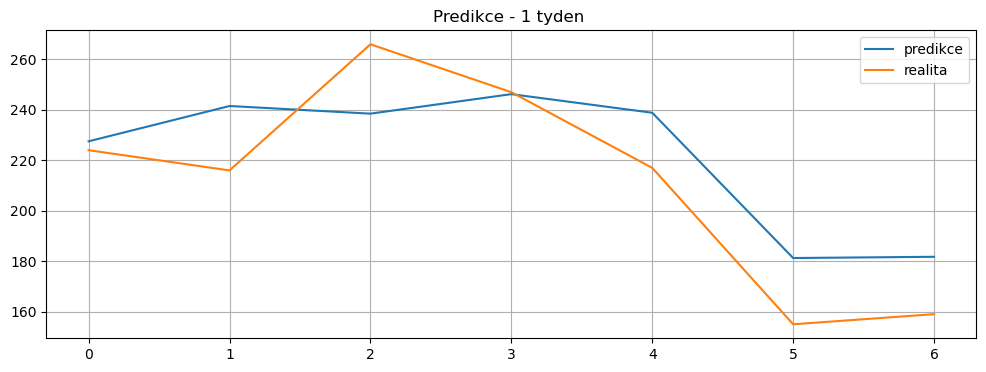

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_hat = model.predict(X_test) # spocti predikce za celou testovaci množinu
y_hat_inv = scaler.inverse_transform(y_hat) # preskaluj predikci do puvodnich hodnot
y_test_inv = scaler.inverse_transform(y_test)# preskaluj do puvodnich hodnot
# vytvoreni puvodni casove rady z maticovych dat
MSE_test = mean_squared_error(y_hat_inv.flatten(),y_test_inv.flatten())
MAE_test = mean_absolute_error(y_hat_inv.flatten(),y_test_inv.flatten())
print(f"Chyba v MSE na testovacich datech {MSE_test}")
print(f"Chyba v MAE na testovacich datech {MAE_test}")
plt.plot(y_hat_inv[0,:], label = 'predikce')
plt.plot(y_test_inv[0,:], label = 'realita' )
plt.legend()
plt.grid()
plt.title(f"Predikce - 1 tyden ")
plt.show()

Na ukázce níže je ukázána tzv. **rolling** predikce, kdy nejprve spočteme predikci modelu pro jeden týden (délka okna $w=7$) a poté tuto predikci opět použijeme jako vstup do modelu. Toto odpovídá praktickému nasazení, kdy chceme predikovat více do budoucnosti, než je výstupní délka okna modelu. Výsledek je porovnán s testovacími daty.

1/1 [==============================] - 0s 38ms/step


Text(0.5, 1.0, 'Rolling predikce - 14 dnu')

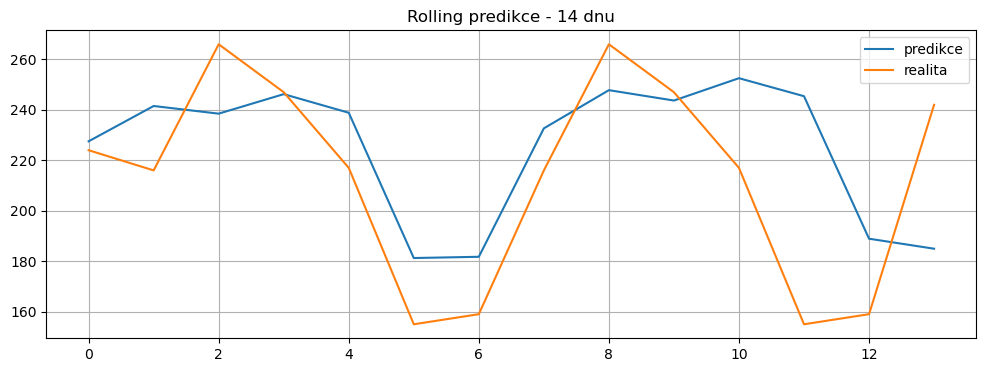

In [31]:
y_tp7 = model.predict(X_test[0,:].reshape(1,w)) # spocti jeden tyden
y_tp14 = model.predict(y_tp7) # pouzij predchozi vystup a sposti dalsi tyden
# transformace vysledku a jejich spojeni, abych to mohl vykreslit
y_14 = np.concatenate((scaler.inverse_transform(y_tp7).flatten(),scaler.inverse_transform(y_tp14).flatten()))
y_r = np.concatenate((scaler.inverse_transform(y_test[0,:].reshape(1,-1)).flatten(),(scaler.inverse_transform(y_test[1,:].reshape(1,-1)).flatten())))
plt.plot(y_14, label = 'predikce')
plt.plot(y_r, label = 'realita')
plt.legend()
plt.grid()
plt.title("Rolling predikce - 14 dnu")

**Úkoly pro samostatnou práci**

1.      Vyzkoušejte různé modifikace modelu jako je počet
vrstev, typ aktivační funkce, velikost minibatche (v metodě fit). Upravte generující funkci modelu tak, aby stačilo pouze zadat příslušné hyperparametry modelu. Nalezněte nejlepší model v metrice MSE.
2.      Pokuste se navrhnout model pro predikci "trendu". Trend vyrobíte tak, že data zprůměrujete za nějaké časové období, např. týden, měsíc, či rok, viz ukázka níže. Tady když data zprůměrujete po týdnech, tak je tam pořád sezónní složka, která má roční periodu, ale pokud bude délka okna rok, tak dojde k vyhlazení. Vyzkoušejte.

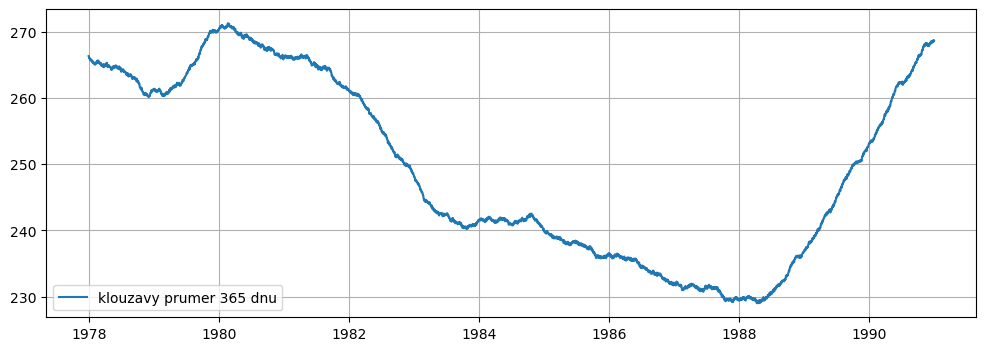

In [32]:
w=365
vyhlazeno_prumer = data.rolling(window=w).mean()
plt.plot(vyhlazeno_prumer, label = f'klouzavy prumer {w} dnu')
plt.legend()
plt.grid()

## Konvoluční sítě - CNN



### Konvoluce



Operace konvoluce, viz obrázek níže, posouvá po zdrojovém obrazu konvoluční okénko (*jádro*, *kernel*) a odpovídající pixely vynásobí vahami z jádra a sečte. Výsledkem této operace je jistá obrazová transformace, která je dána hodnotami jádra.


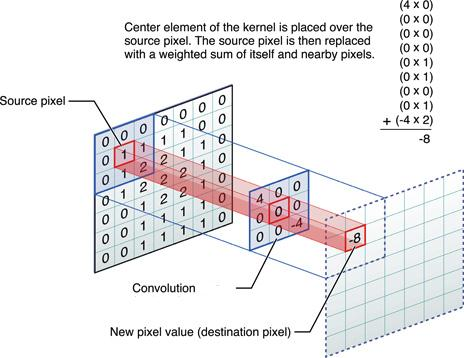


Zdroj obrázku [https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411](https://medium.com/@bdhuma/6-basic-things-to-know-about-convolution-daef5e1bc411)

In [33]:
import matplotlib.pyplot as plt
import numpy as np


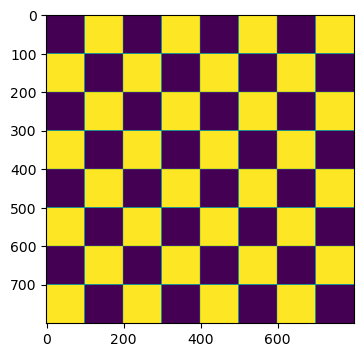

In [34]:
x=np.zeros((800,800))
for row in range(8):
  for col in range(8):
    if (row+col)%2==1:
      x[row*100:(row+1)*100,col*100:(col+1)*100]=200
plt.imshow(x ) #

Vyzkoušíme si výsledek konvoluce s využitím různých jader pomocí [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html). Aplikace konvoluce na obrázky, detekce hran apod. je popsána [zde](https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html).

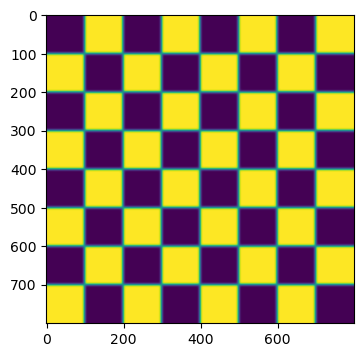

In [35]:
from scipy import signal

ker_blur = np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
x_blured= signal.convolve2d(x, ker_blur, boundary='symm', mode='same')
# rozmazani jednou neni poradne vidět, tak radsi vickrat - opakovana konvoluce
for i in range(20): # radsi vickrat, aby to bylo videt na projektoru
  x_blured= signal.convolve2d(x_blured, ker_blur, boundary='symm', mode='same')

plt.imshow(x_blured)# ,cmap='gray', vmin=0, vmax=255

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


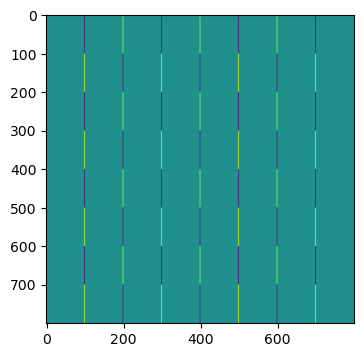

In [36]:
# jiná jádra
ker_sobel= np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print(ker_sobel)
x_sobel=signal.convolve2d(x, ker_sobel, boundary='symm', mode='same')
plt.imshow(x_sobel)# ,cmap='gray', vmin=0, vmax=255

### Vylepšení modelu pomocí konvoluční vrstvy - CNN

Nyní si ukážeme použití modernějšího modelu pro zpracování obrazových dat a to konvolučních neuronových sítí ( Convolutional Neural Network). Základní kritika předchozího modelu spočívá v tom, že když rozvineme obrázky do vektorů, tak přijdeme o topologickou informaci, tj. informaci uloženou v tom, že některé pixely jsou u sebe.
Jiný pohled je takový, že pouhý jas daného pixelu je nedostačující. Pokud chceme rozpoznávat třeba zvířata, poznáváme je dle některých rysů, tj. když zmenším či zvětším obrázek kočky, tak tam pořád zůstávají charakteristické rysy kočky, např. vousy, uši, či ocas. Informace o přítomnosti těchto rysů nám zajistí tzv. konvoluční část neuronové sítě, viz obrázek níže.

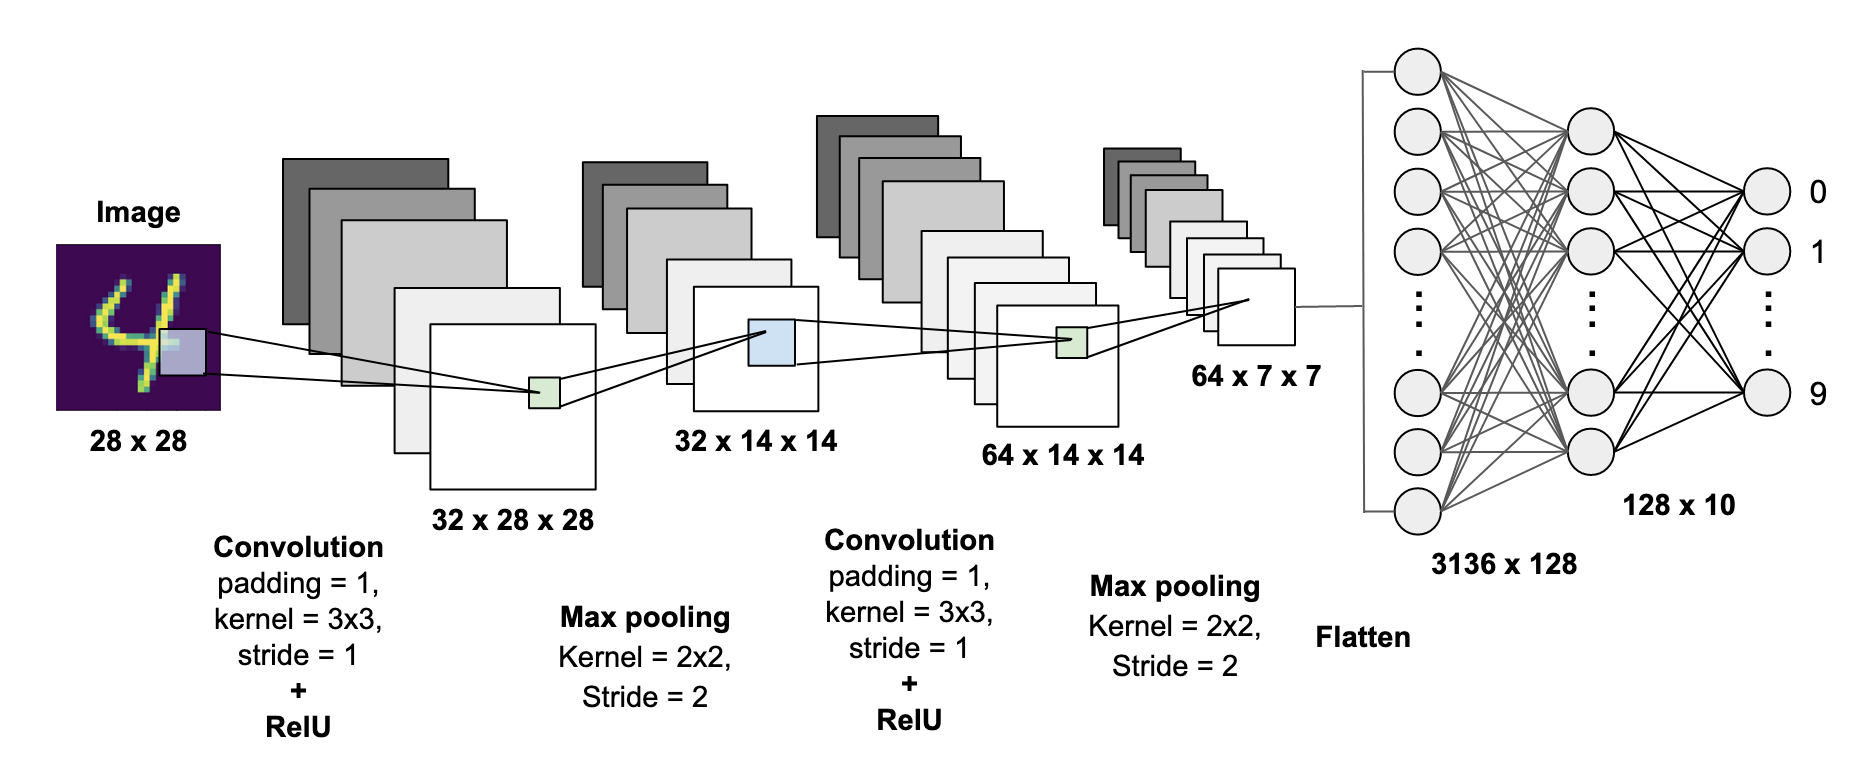


Zdroj obrázku [https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9](https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9(

 Při učení neuronové sítě dochází k nastavování těchto vah tak, aby ve výsledku docházelo ke zvýrazňování určitých vzorů. V nižších vrstvách sítě dochází ke zvýrazňování jednoduchých vzorů, jako jsou např. místa s větší intenzitou, či hrany. V následujících vrstvách dochází ke skládání těchto jednoduchých příznaků v komplexnější. Ukázku toho, co je výsledkem konvolucí na některých vrstvách nalezne čtenář [zde](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html). Poznamenejme, že konvoluce se provádí za každý kanál obrázku samostatně.

Jako parametry konvoluční neuronové sítě se nastavují velikosti jader (liché číslo), způsoby posunu daného okna, aktivační funkce aplikovaná na výsledek konvoluce a počty konvolučních jednotek a vrstev.

Obvykle se mezi konvoluční vrstvy ještě doplňuje tzv. *poolování*, které redukuje dimenzionalitu problému a zároveň modelu umožní vzít v potaz jen nejdůležitější rysy. Princip poolování je na obrázku níže. Opět je možné předepsat velikost okna a typ poolování.


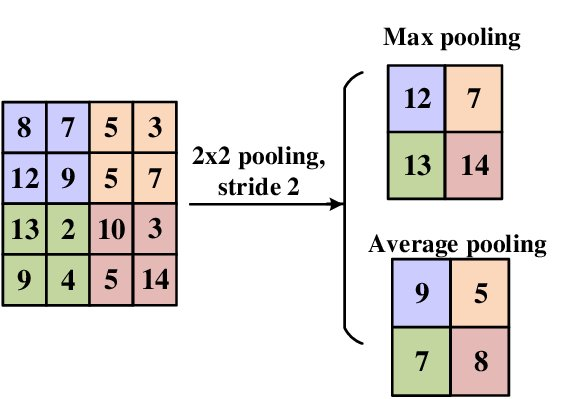

Zdroj obrázku [https://www.researchgate.net/publication/340812216_Deep_Neural_Networks_on_Chip_-_A_Survey/figures?lo=1](https://www.researchgate.net/publication/340812216_Deep_Neural_Networks_on_Chip_-_A_Survey/figures?lo=1)

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

V následující buňce jsou data opět načtena a vykreslena.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


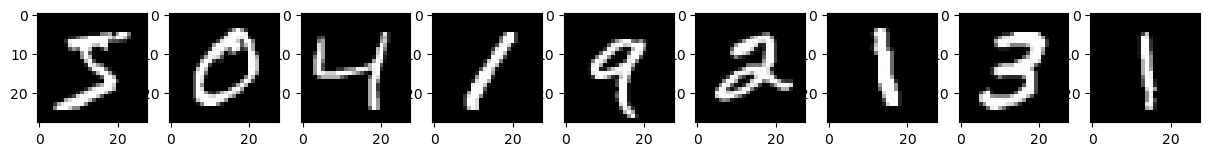

In [38]:
train_data, test_data = tf.keras.datasets.mnist.load_data()
X_tr,y_tr = train_data
X_test,y_test = test_data
print(f'{X_tr.shape}')
print(f'{y_tr.shape}')
print(f'{X_test.shape}')
print(f'{y_test.shape}')

fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
  ax.imshow(X_tr[index],cmap='gray')
plt.show()

Poté dochází k jejich normalizaci na interval $<0,1>$, podobně jako v předchozím příkladu. Nyní ovšem pracujeme s obrázky, které mají jen jeden kanál, viz *INPUT_SHAPE*. Dále již jen převod na kategorické proměnné.

In [39]:
# Normalizace <0,255> -> <0,1>
X_tr = X_tr/255.0
X_test = X_test/255.0

INPUT_SHAPE = (28, 28, 1)
CATEGORIES = 10

# prevod na kategoricke promenne
y_tr_cat = tf.keras.utils.to_categorical(y_tr, CATEGORIES)  # preved na matici vystupu [1] -> [0,1,0,0,0]
y_test_cat = tf.keras.utils.to_categorical(y_test, CATEGORIES)


V další buňce je opět vytvořena funkce, která vrací model. Povšimněte si  předepisování parametrů konvoluční vrstvy, či použití tzv. *dropoutů* pro regularizaci. Tato konvoluční vrstva je pak pomocí *zploštění* (*flatten*) převedena na klasický *MLP* model.

Model je vytvořen a pak pomocí metody *fit()* naučen. Počet epoch je vzhledem k výpočetní náročnosti modelu nižší než v předchozím případě.

In [40]:
from tensorflow.keras import models, layers
def get_model():
  model = models.Sequential()
  model.add(layers.Input(shape=INPUT_SHAPE))
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(64, kernel_size=(5, 5), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(CATEGORIES, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


EPOCHS = 10
model = get_model()
history = model.fit(X_tr, y_tr_cat, epochs=EPOCHS, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 103s 61ms/step - loss: 0.2289 - accuracy: 0.9286 - val_loss: 0.0552 - val_accuracy: 0.9862
Epoch 2/10
1688/1688 [==============================] - 132s 78ms/step - loss: 0.0800 - accuracy: 0.9753 - val_loss: 0.0469 - val_accuracy: 0.9868
Epoch 3/10
1688/1688 [==============================] - 138s 82ms/step - loss: 0.0615 - accuracy: 0.9807 - val_loss: 0.0377 - val_accuracy: 0.9892
Epoch 4/10
1688/1688 [==============================] - 143s 85ms/step - loss: 0.0519 - accuracy: 0.9835 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 5/10
1688/1688 [==============================] - 145s 86ms/step - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0301 - val_accuracy: 0.9913
Epoch 6/10
1688/1688 [==============================] - 139s 82ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0300 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 123s 73ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0

Zhodnocení procesu učení pomocí *accuracy* a průběhu minimalizace ztrátové funkce je v kódu níže. Je vidět, že model dosahuje poměrně brzy vysoké přesnosti jak na trénovacích, tak i na validačních datech.

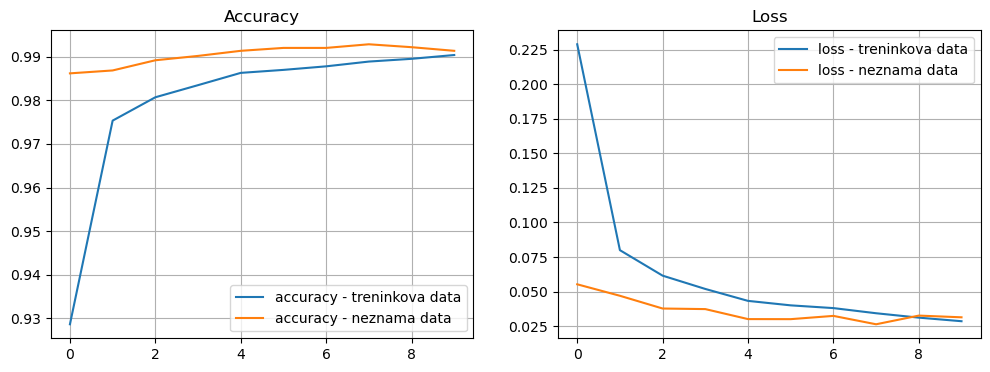

In [41]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='accuracy - treninkova data')
axis[0].plot(history.history['val_accuracy'], label='accuracy - neznama data')
axis[0].grid()
axis[0].set_title('Accuracy')
axis[0].legend()

axis[1].plot(history.history['loss'], label='loss - treninkova data')
axis[1].plot(history.history['val_loss'], label='loss - neznama data')
axis[1].grid()
axis[1].set_title('Loss')
axis[1].legend()

V poslední buňce je určena matice záměn a spočtena *accuracy* modelu na testovacích datech. Srovnejte s předchozím modelem, kde je nižší.

In [42]:
from sklearn.metrics import confusion_matrix # matice
yhat = model.predict(X_test)
vysl = np.argmax(yhat,axis=1)
cm = confusion_matrix(y_test, vysl)
print(cm)

print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test, y_test_cat)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 2ms/step
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    1    1    0    0    0    1    0    0]
 [   0    1 1026    0    0    0    0    5    0    0]
 [   0    0    1 1003    0    5    0    0    1    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   0    0    0    5    0  884    1    1    0    1]
 [   2    2    0    0    1    1  951    0    1    0]
 [   0    2    2    0    0    1    0 1021    1    1]
 [   0    1    0    1    1    2    1    0  966    2]
 [   0    0    0    1    5    6    0    4    2  991]]
Ohodnoceni na testovacich datech
313/313 [==============================] - 1s 4ms/step - loss: 0.0227 - accuracy: 0.9931
test loss, test acc: [0.022737864404916763, 0.9930999875068665]


**Úkoly pro samostatnou práci**

1. Vyzkoušejte navrhnout model pro dataset [EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset).
2. Vyzkoušejte úlohu Hackatlonu [zde](https://drive.google.com/drive/folders/1smpaz4IPeKJ3dXEkOyQ8GGr9QfPRlTgy?usp=drive_link). Dostanete se přes 90% v accuracy?
3. Vyzkoušejte použití naučených modelů, kde si jen upravíte vrchní vrstvy - [transfer learning](https://www.tensorflow.org/tutorials/images/transfer_learning).

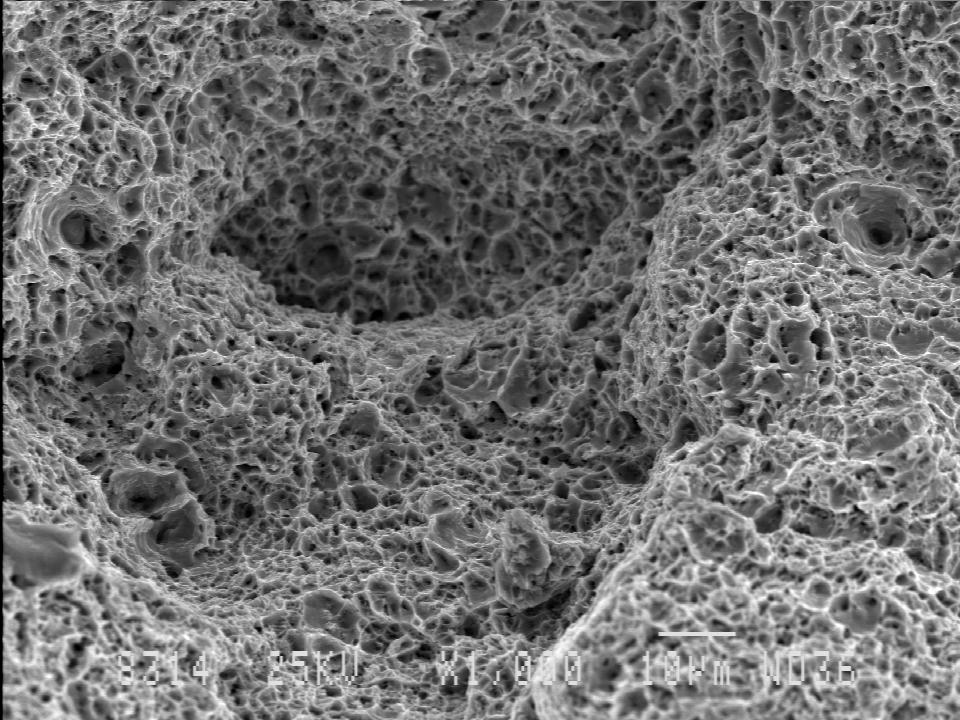

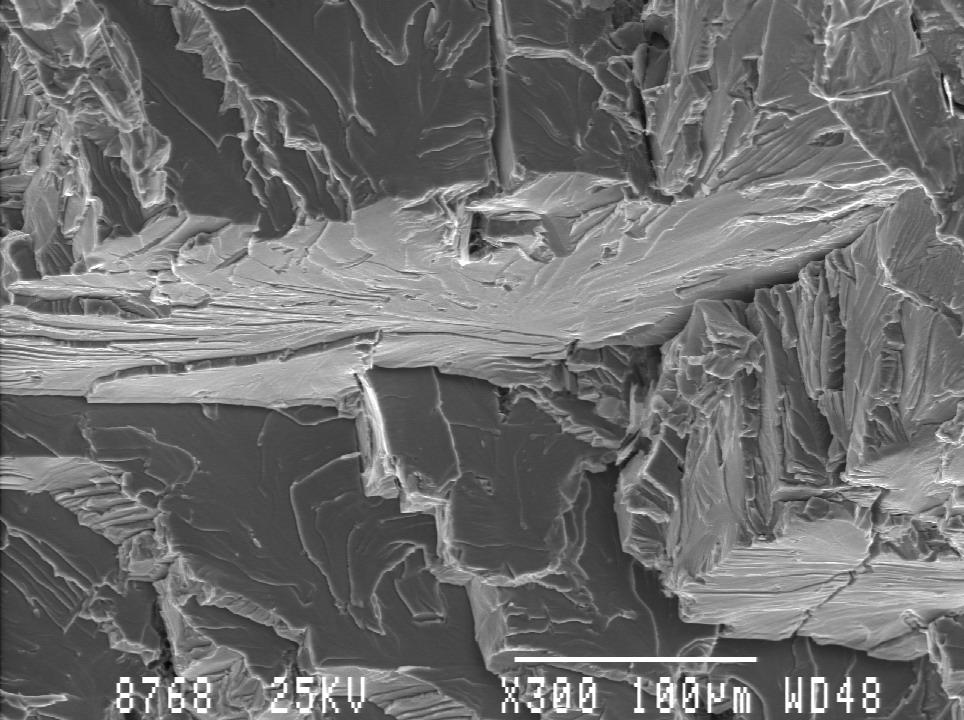

# PyTorch - Jen ukázka

Alternativní framework [https://pytorch.org/](https://pytorch.org/). Požaduje trochu hlubší úroveň programování.

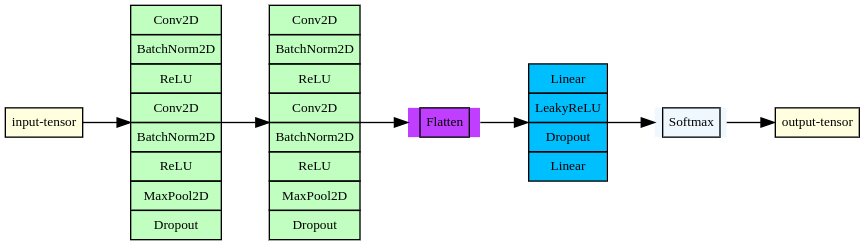

Toto Vám asi nepůjde přímo spustit. Slouží pro popis co je třeba udělat v PyTorch.

In [44]:
from os import listdir
from os.path import join
import pandas as pd
import torch
import torch.nn as nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import Dataset, Subset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as transforms
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


Konfigurace modelu

In [45]:

IM_WIDTH = 224
IM_HEIGHT = 224
BATCH_SIZE = 20
EPOCHS = 50

"""
Za každý double konvoluční blok je třeba z rozlišení odečíst 4 a dělit pool_size.
Dva bloky
 1:{"in_channels":3,"out_channels":32,"kernel_size":3,"pool_size":2 },
 2:{"in_channels":32,"out_channels":64,"kernel_size":3,"pool_size":2}
 a obrázek 3x224x224
Příklad: 3x224x224->32x106x106->64x53x53=179776 parametrů po flatten.
"""

CNN_CONF = [
    {"in_channels": 3,
     "out_channels": 64,
     "kernel_size": 3,
     "pool_size": 2
     },
    {"in_channels": 64,  # 32 staci batch 20, pro 64 musi byt mensi
     "out_channels": 64,
     "kernel_size": 3,
     "pool_size": 2
     }
]
DENSE_CONF = [
    {"in": 179776,
     "out": 512,
     "activation": True,
     "dropout": 0.1},  # 0.01
    {
        "in": 512,
        "out": 2,
        "activation": False,
        "dropout": None}
]

Sestavení modelu. Kód je rozdelen na menší bloky, které pak skládám. Všimněte si metody **forward()**. což je podobné call u Kerasu.

In [46]:
# CNN blok
class CNNConvolutionBlock(nn.Module):
    """ Blok s dvojitou onvolucí a batch normalizací"""
    def __init__(self, in_channels, out_channels, kernel_size, pool_size) -> None:
        super(CNNConvolutionBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(pool_size))
    def forward(self, x):
        return self.conv(x)

# Dense klasifikátor
class DenseBlock(nn.Module):
    """Výstupní dense klasifikátor"""
    def __init__(self, input_size, output_size, activation, dropout) -> None:
        super(DenseBlock, self).__init__()
        self.dense = nn.Sequential(
            nn.Linear(input_size, output_size),
        )
        if activation:
            self.dense.add_module("relu", nn.ReLU())

        if dropout is not None:
            self.dense.add_module("dropout", nn.Dropout(dropout))

    def forward(self, x):
        return self.dense(x)

# Výsledný klasifikátor sestavený z bloků
class CNN1ShiftClassifier(nn.Module):
    def __init__(self, cnn_config, dense_config):
        super(CNN1ShiftClassifier, self).__init__()
        # model je sestaven na základě výše uvedené konfigurace
        self.cnn_modules = nn.ModuleList()
        for conf in cnn_config:
            self.cnn_modules.append(CNNConvolutionBlock(
                in_channels=conf["in_channels"],
                out_channels=conf["out_channels"],
                kernel_size=conf["kernel_size"],
                pool_size=conf["pool_size"])
            )

        self.flat = nn.Flatten()
        self.dense_modules = nn.ModuleList()
        for conf in dense_config:
            self.dense_modules.append(DenseBlock(
                input_size=conf["in"],
                output_size=conf["out"],
                activation=conf["activation"],
                dropout=conf["dropout"]))

    def forward(self, x):
        out = self.cnn_modules[0](x) #počátek konvoluční části
        for mod in self.cnn_modules[1:]:
            out = mod(out)
        out = self.flat(out) # flatnutí konvoluční části na
        for mod in self.dense_modules: # počátek dense části
            out = mod(out)
        return F.softmax(out, dim=1)

    def cross_entropy_loss(self, logits, labels):
        return F.nll_loss(logits, labels)



PyTorch umožňuje použití **datasetů**, jako datové abstrakce. Zde na ukázce kódu je jeden pro načítání a transformaci dat.

In [47]:
class ShiftCroppedDataset(Dataset):
    """Tento dataset načte obrázky z adresářů a pro každý obrázek dodá do datasetu i několik výřezů obrázku"""
    def _get_cropped_parts(self, f, count):
        """Pomocná metoda - transformuji obrázek - augmentace dat"""
        image = torch.tensor(read_image(f), dtype=torch.float)
        return [ self.cropper(image) for i in range(count)]

    def __init__(self, type_0_path, type_1_path, multiplier=1, seed=42, im_size=(IM_HEIGHT, IM_WIDTH), transform=None):
        """Načtení obrázků z adresářů"""
        self.transform = transform
        self.cropper =  transforms.RandomResizedCrop(size=im_size)
        type_0_files = [join(type_0_path, f) for f in listdir(type_0_path)]
        type_1_files = [join(type_1_path, f) for f in listdir(type_1_path)]
        print(f"Read:{len(type_0_files)} of class 0")
        print(f"Read:{len(type_1_files)} of class 1")
        self.images = []
        self.labels = []
        for f in type_0_files:
            for im in self._get_cropped_parts(f, multiplier):
                if self.transform:
                    im = self.transform(im)
                self.images.append(im)
                self.labels.append(0)

        print(f"Created:{len(self.labels)} of class 0")
        count1 = 0
        for f in type_1_files:
            for im in self._get_cropped_parts(f, multiplier):
                if self.transform:
                    im = self.transform(im)
                self.images.append(im)
                self.labels.append(1)
                count1+=1
        self.images = torch.stack(self.images, dim=0)
        print(f"Created:{count1} of class 1")


    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

    def images_tensor(self):
        return self.images



In [48]:
# další pomocné metody

def get_rgb_statistics(dataset: ShiftCroppedDataset): # statistika nad datasetem - info o kanálech, pro normalizaci
    rgb = torch.zeros((3))
    rgb_sum = torch.zeros((3))
    for img, label in dataset:
        rgb += torch.sum(img, dim=(1, 2))
    rgb_mean = rgb / (len(dataset) * IM_WIDTH * IM_HEIGHT)
    for img, label in dataset:
        rgb_sum += (torch.sum(img, dim=(1, 2)) / (IM_WIDTH * IM_HEIGHT) - rgb_mean) ** 2
    rgb_std = torch.sqrt(rgb_sum / len(dataset))
    print(f"Data set mean: {rgb_mean}")
    print(f"Data set std: {rgb_std}")
    return rgb_mean, rgb_std


def train_test_dataset(dataset: ShiftCroppedDataset, val_split=0.2, seed=42): # z jednoho datasetu vytvořím dva - trénovací a testovací
    train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=val_split, random_state=seed)
    return Subset(dataset, train_idx), Subset(dataset, test_idx)

def get_n_params(model): # výpočet počtu parametrů modelu
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

Vlastní kód. Důležité části:

*  Vytvoření datasetů
*  Vytvoření loaderů - řeší načítání batchů, paralelizaci načítání apod.
*  Přenos modelu a pomocných tensorů na GPU/CPU, dle toho co je k dispozici
*  V případě více GPU jednotek paralelizace na více karet
*  Inicializace optimalizátoru
*  Vlastní učící smyčka přes epochy:
  - Iterace přes jednotlivé batche
  - Downcasting typu - float16 - šetří pamět na GPU, viz [AMP](https://pytorch.org/docs/stable/amp.html)
  - Iterace optimalizátoru
  - Vyhodnocení na tréninkových datech


In [ ]:

if __name__ == "__main__":
    normalize_transform = transforms.Compose([transforms.Normalize((96.3227, 96.3227, 96.3228),
                                                                   (20.5640, 20.5639, 20.5640))])
    #!!!Vytvoření datasetů
    dataset = ShiftCroppedDataset("rawdata/stepnylom_jpg/", "rawdata/tvarnylom_jpg/", multiplier=5, transform=normalize_transform)
    # get_rgb_statistics(dataset)
    train_dataset, test_dataset = train_test_dataset(dataset)
    #!!!Vytvoření loaderů
    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
    # Konstrukce modelu a tisk infa o něm
    model = CNN1ShiftClassifier(cnn_config=CNN_CONF, dense_config=DENSE_CONF)
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    #params = sum([np.prod(p.size()) for p in model_parameters])
    #print(params)
    #print(get_n_params(model))

    #!!! nastavení CUDA+Pparalelismus
    loss_fn = nn.NLLLoss()
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    print(f"USE CUDA: {use_cuda} ")
    if torch.cuda.is_available():
        print(f"CUDA devices: {torch.cuda.device_count()}")
        if torch.cuda.device_count() > 1:
            model = nn.DataParallel(model)  # udelej to paralelni
            print(f"Model set to data parallel model.")
        model = model.to(device)  # hod to na GPU
        loss_fn = loss_fn.to(device)  # hod na GPU i kriterialni funkci
    #!!! Nastavení optimalizátoru
    optimizer = torch.optim.SGD(model.parameters(), lr=0.00001, momentum=0.95)  # lr=0.0001
    print("Start")
    results = {
        "train_loss":[], "test_loss":[],
        "train_acc": [], "test_acc": []}
    max_test_acc =0.0
    #!!! Učící smyčka
    for epoch in range(EPOCHS):
        loss_train = 0.0
        acc = 0
        count = 0
        #!!! Pro každý batch dělej
        for bid, batch in enumerate(train_dataloader):
            inputs, labels = batch
            inputs = inputs.to(device=device, dtype=torch.float16)
            labels = labels.to(device=device)
            #!!! Downcastuje model
            with torch.autocast(device_type=device.type, enabled=True):
                y_pred = model(inputs)
                loss = loss_fn(y_pred, labels)
            #!!! Udělej krok optimalizátoru
            optimizer.zero_grad() # nejprve vynuluj gradienty. Defaultně se akumulují
            loss.backward()
            optimizer.step()
            item = loss.item()
            loss_train += item
            print(f"\tEPOCH:{epoch}:{bid}--->{item}::::{loss_train}")
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
        acc /= count
        results["train_acc"].append(acc.cpu().numpy())
        results["train_loss"].append(loss_train)
        print(f"Train>Epoch {epoch}/{EPOCHS}: model accuracy {acc * 100} loss:\t{loss_train}")
        #!!! Vyhodnoť na tréninkových datech
        acc = 0
        count = 0
        loss_test = 0.0
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device=device, dtype=torch.float16)
            labels = labels.to(device=device)
            with torch.autocast(device_type=device.type, enabled=True):
                y_pred = model(inputs)
                loss = loss_fn(y_pred, labels)

            item = loss.item()
            loss_test += item
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
        acc /= count
        if max_test_acc < acc: # kdyz je lepsi acc
            print("Save model")
            max_test_acc = acc
            torch.save(model.state_dict(), f"crop_best_model_.pth")
        results["test_acc"].append(acc.cpu().numpy())
        results["test_loss"].append(loss_test)
        print(f"Test>Epoch {epoch}: model accuracy/best {acc * 100}/{max_test_acc} loss:\t{loss_test}")
        print(f"*"*50)
